## 모듈 import

In [1]:
%run import_modules.py
%matplotlib inline
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'catboost_info',
 'extremum_20220621005029.csv',
 'import_modules.py',
 'LPI 지수.xlsx',
 'raw_data.xlsx',
 'stat_106001_2000~2016.xls',
 'stat_106001_2017~2021.xls',
 'stat_106103_2000~2016.xls',
 'stat_106103_2017~2021.xls',
 'stat_106801_2000~2017.xls',
 'stat_106801_2017~2021.xls',
 'stat_107301_2000~2017.xls',
 'stat_107301_2018~2021.xls',
 'stat_273601.xls',
 'zNex~$hareensemble_results.csv',
 'zNex~$haresubmissionR2.csv',
 '경공업품_수출.xlsx',
 '공모전 코드 - 복사본.ipynb',
 '공모전 코드.ipynb',
 '날씨(2000 ~ 2021).txt',
 '빅데이터분석_이정은(박우열).xlsx',
 '산업통상자원부_기업별 자동차 산업 현황_20211231.csv',
 '산업통상자원부_반도체디스플레이 수출동향 추이_20211231.csv',
 '수출물가지수(기본분류)_달러기준.xlsx',
 '수출물가지수(기본분류)_원화기준.xlsx',
 '식료및직접소비재_수출.xlsx',
 '신성질별 수출입실적_소비재.xlsx',
 '신성질별 수출입실적_원자재.xlsx',
 '신성질별 수출입실적_자본재.xlsx',
 '원료및연료_수출.xlsx',
 '이정은_XGBOOST모델 기반 한국수출금액 예측_22.07.02.zip',
 '제10회 산업통상자원부 공공데이터 활용 BI공모전_빅데이터분석결과서 양식.hwp',
 '제10회 산업통상자원부 공공데이터 활용 BI공모전_빅데이터분석결과서_이정은,박우열.hwp',
 '제10회 산업통상자원부 공공데이터활용 BI공모전_빅데이터 분석 과제 1.hwp'

## 데이터 불러오기

In [3]:
raw_data = pd.read_excel('C:/Users/jeong/Desktop/공모전/raw_data.xlsx', sheet_name = 1 )
sample = pd.read_excel('C:/Users/jeong/Desktop/공모전/raw_data.xlsx', sheet_name = 2 )

In [4]:
raw_data

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [5]:
raw_data.describe()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,3.523252e+10,8.373895e+09,4.586592e+09,1.637289e+09,2.075410e+09,2.206066e+09
std,1.337332e+10,4.046707e+09,1.478022e+09,1.568664e+09,8.645194e+08,5.579356e+08
min,1.102304e+10,1.235215e+09,2.267664e+09,9.483084e+07,6.580252e+08,1.054723e+09
25%,2.325228e+10,4.910558e+09,3.380042e+09,3.000869e+08,1.395521e+09,1.845121e+09
50%,3.939702e+10,9.678116e+09,4.392580e+09,9.739663e+08,2.132129e+09,2.181504e+09
75%,4.631255e+10,1.165777e+10,5.726193e+09,2.755565e+09,2.651957e+09,2.521424e+09
max,6.073412e+10,1.534256e+10,8.787542e+09,5.617023e+09,4.903221e+09,3.719723e+09


In [6]:
data = raw_data.copy()

In [7]:
sample

,기간,한국 수출금액
0,2022-01-01,NaN
1,2022-02-01,NaN
2,2022-03-01,NaN
3,2022-04-01,NaN
4,2022-05-01,NaN
5,2022-06-01,NaN


## 파생변수

### 기준연도, 기준월 분리

In [8]:
data['기준연도'] = data['기간'].dt.year
data['기준연도'] = data['기준연도'].astype('str')
data['기준월'] = data['기간'].dt.month
data['기준월'] = data['기준월'].astype('str')

In [9]:
print(data['기준연도'].unique())
print(data['기준월'].unique())

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']


### 수출관련 변수 붙이기 -  반도체 수출동향, 자동차산업 수출동향, 환율, 금리, GDP, 유가, 물가, 날씨, 관세, 코로나 발생 수 등

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기간         264 non-null    datetime64[ns]
 1   한국 수출금액    264 non-null    int64         
 2   한국의대중국수출   264 non-null    int64         
 3   한국의대미국수출   264 non-null    int64         
 4   한국의대베트남수출  264 non-null    int64         
 5   한국의대홍콩수출   264 non-null    int64         
 6   한국의대일본수출   264 non-null    int64         
 7   기준연도       264 non-null    object        
 8   기준월        264 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 18.7+ KB


### 반도체 수출동향
산업통상자원부 반도체디스플레이 수출동향 추이_엑셀정리

In [11]:
data_ram = pd.read_csv('산업통상자원부_반도체디스플레이 수출동향 추이_20211231.csv',  encoding= 'cp949')
data_ram

,기간,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),메모리_MCP(억불),시스템_반도체(억불),개별소자(억불),디스플레이_패널(억불)
0,2015-01-01,52.6,28.3,18.6,3.0,6.7,19.1,1.3,26.6
1,2015-02-01,47.6,26.7,17.6,2.6,6.4,16.4,1.1,22.9
2,2015-03-01,53.9,27.7,17.3,2.1,8.2,20.9,1.3,26.2
3,2015-04-01,51.6,26.9,16.1,2.2,8.5,19.8,1.3,26.9
4,2015-05-01,51.1,26.1,15.9,2.1,8.0,20.5,1.2,26.7
...,...,...,...,...,...,...,...,...,...
79,2021-08-01,117.0,76.4,37.6,5.7,28.2,35.6,5.0,19.5
80,2021-09-01,121.8,79.5,37.8,6.6,30.3,37.5,4.8,21.7
81,2021-10-01,111.7,69.5,35.6,6.3,23.5,37.3,4.9,19.7
82,2021-11-01,120.4,76.4,37.1,6.2,30.2,39.1,4.9,21.3


In [12]:
data_ram['기준연도'] = data_ram['기간'].str[0:4]
data_ram['기준연도'] = data_ram['기준연도'].astype('str')
data_ram['기준월'] = data_ram['기간'].str[5:7].astype('int')
data_ram['기준월'] = data_ram['기준월'].astype('str')
data_ram.head(12)

,기간,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),메모리_MCP(억불),시스템_반도체(억불),개별소자(억불),디스플레이_패널(억불),기준연도,기준월
0,2015-01-01,52.6,28.3,18.6,3.0,6.7,19.1,1.3,26.6,2015,1
1,2015-02-01,47.6,26.7,17.6,2.6,6.4,16.4,1.1,22.9,2015,2
2,2015-03-01,53.9,27.7,17.3,2.1,8.2,20.9,1.3,26.2,2015,3
3,2015-04-01,51.6,26.9,16.1,2.2,8.5,19.8,1.3,26.9,2015,4
4,2015-05-01,51.1,26.1,15.9,2.1,8.0,20.5,1.2,26.7,2015,5
5,2015-06-01,53.1,28.7,18.0,2.3,8.3,19.3,1.2,25.8,2015,6
6,2015-07-01,51.4,28.2,16.7,2.2,9.3,17.6,1.3,25.6,2015,7
7,2015-08-01,54.5,30.2,15.4,2.3,12.4,19.1,1.3,24.9,2015,8
8,2015-09-01,58.6,32.3,15.5,2.2,14.6,21.1,1.2,24.5,2015,9
9,2015-10-01,55.0,29.4,14.7,2.0,12.6,20.6,1.2,25.1,2015,10


In [13]:
data_ram = data_ram.drop('기간', 1)

In [14]:
data_00 = pd.merge(data, data_ram, on=['기준연도','기준월'], how='left')
data_00

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),메모리_MCP(억불),시스템_반도체(억불),개별소자(억불),디스플레이_패널(억불)
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,37.6,5.7,28.2,35.6,5.0,19.5
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,37.8,6.6,30.3,37.5,4.8,21.7
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,35.6,6.3,23.5,37.3,4.9,19.7
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,37.1,6.2,30.2,39.1,4.9,21.3


### 자동차 산업현황
산업통상자원부_기업별 자동차 산업현황_ 월별_엑셀정리

In [15]:
data_car = pd.read_csv('산업통상자원부_기업별 자동차 산업 현황_20211231.csv', encoding= 'cp949')
data_car

,기간,수출수량(대),수출금액(천달러),생산수량(대)
0,2009년 01월,122946,1245213.000,189333
1,2009년 02월,151573,1536076.000,237006
2,2009년 03월,161765,1592435.000,261701
3,2009년 04월,169815,1766922.000,269263
4,2009년 05월,153093,1599027.000,256329
...,...,...,...,...
151,2021년 08월,130213,2703340.984,234963
152,2021년 09월,151214,3209295.020,229423
153,2021년 10월,160123,3463587.888,263723
154,2021년 11월,175621,3696912.021,302983


In [16]:
data_car['기준연도'] = data_car['기간'].str[0:4]
data_car['기준연도'] = data_car['기준연도'].astype('str')
data_car['기준월'] = data_car['기간'].str[6:8].astype('int')
data_car['기준월'] = data_car['기준월'].astype('str')
data_car.head(12)

,기간,수출수량(대),수출금액(천달러),생산수량(대),기준연도,기준월
0,2009년 01월,122946,1245213.0,189333,2009,1
1,2009년 02월,151573,1536076.0,237006,2009,2
2,2009년 03월,161765,1592435.0,261701,2009,3
3,2009년 04월,169815,1766922.0,269263,2009,4
4,2009년 05월,153093,1599027.0,256329,2009,5
5,2009년 06월,179645,1874232.0,315921,2009,6
6,2009년 07월,181382,1969360.0,310342,2009,7
7,2009년 08월,141189,1510884.0,232552,2009,8
8,2009년 09월,225411,2464029.0,369347,2009,9
9,2009년 10월,209460,2343194.0,337252,2009,10


In [17]:
data_car = data_car.drop('기간', 1)

In [18]:
data_car

,수출수량(대),수출금액(천달러),생산수량(대),기준연도,기준월
0,122946,1245213.000,189333,2009,1
1,151573,1536076.000,237006,2009,2
2,161765,1592435.000,261701,2009,3
3,169815,1766922.000,269263,2009,4
4,153093,1599027.000,256329,2009,5
...,...,...,...,...,...
151,130213,2703340.984,234963,2021,8
152,151214,3209295.020,229423,2021,9
153,160123,3463587.888,263723,2021,10
154,175621,3696912.021,302983,2021,11


In [19]:
data_0 = pd.merge(data_00, data_car, on=['기준연도','기준월'], how='left')
data_0

,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),메모리_MCP(억불),시스템_반도체(억불),개별소자(억불),디스플레이_패널(억불),수출수량(대),수출금액(천달러),생산수량(대)
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,37.6,5.7,28.2,35.6,5.0,19.5,130213.0,2703340.984,234963.0
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,37.8,6.6,30.3,37.5,4.8,21.7,151214.0,3209295.020,229423.0
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,35.6,6.3,23.5,37.3,4.9,19.7,160123.0,3463587.888,263723.0
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,37.1,6.2,30.2,39.1,4.9,21.3,175621.0,3696912.021,302983.0


### 환율
출처 : e-나라지표 기획재정부 (통화별 환율 조사통계)
주석 : * 환율은 서울외환시장 종가(15:00현재, '05.2월 이전은 16:00현재, '03년 이전은 16:30현재) * 절상율은 전년말비 변동율

In [20]:
data_ER_1 = pd.read_excel('stat_106801_2000~2017.xls', index_col = 0, header = None)
data_ER_2 = pd.read_excel('stat_106801_2017~2021.xls', index_col = 0, header = None)
data_ER = pd.concat([data_ER_1.T, data_ER_2.T])
data_ER['기준연도'] = data_ER['기간'].str[0:4]
data_ER['기준연도'] = data_ER['기준연도'].astype('str')
data_ER['기준월'] = data_ER['기간'].str[4:6].astype('int')
data_ER['기준월'] = data_ER['기준월'].astype('str')
data_ER.head(10)

,기간,원/달러,엔/달러,원/100엔,기준연도,기준월
1,200001월,1123.2,106.9,1049.7,2000,1
2,200002월,1131,109.4,1034.4,2000,2
3,200003월,1106,105.9,1047,2000,3
4,200004월,1109.1,108.2,1026.3,2000,4
5,200005월,1129.4,106.6,1063.3,2000,5
6,200006월,1115,105.2,1060,2000,6
7,200007월,1116.7,109.6,1018.4,2000,7
8,200008월,1108.8,106.7,1039.3,2000,8
9,200009월,1115.1,108.2,1030.9,2000,9
10,200010월,1139,109,1042.7,2000,10


In [21]:
data_ER.columns

Index(['기간', '원/달러', '엔/달러', '원/100엔', '기준연도', '기준월'], dtype='object', name=0)

In [22]:
data_ER['원/달러'] = data_ER['원/달러'].astype('float')
data_ER['엔/달러'] = data_ER['엔/달러'].astype('float')
data_ER['원/100엔'] = data_ER['원/100엔'].astype('float')
data_ER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1 to 48
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      264 non-null    object 
 1   원/달러    264 non-null    float64
 2   엔/달러    264 non-null    float64
 3   원/100엔  264 non-null    float64
 4   기준연도    264 non-null    object 
 5   기준월     264 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.4+ KB


In [23]:
data_1 = pd.merge(data_0, data_ER, on=['기준연도','기준월'], how='left')
data_1 = data_1.drop(['기간_x', '기간_y'],1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   한국 수출금액       264 non-null    int64  
 1   한국의대중국수출      264 non-null    int64  
 2   한국의대미국수출      264 non-null    int64  
 3   한국의대베트남수출     264 non-null    int64  
 4   한국의대홍콩수출      264 non-null    int64  
 5   한국의대일본수출      264 non-null    int64  
 6   기준연도          264 non-null    object 
 7   기준월           264 non-null    object 
 8   반도체(억불)       84 non-null     float64
 9   메모리(억불)       84 non-null     float64
 10  메모리_D램(억불)    84 non-null     float64
 11  메모리_낸드(억불)    84 non-null     float64
 12  메모리_MCP(억불)   84 non-null     float64
 13  시스템_반도체(억불)   84 non-null     float64
 14  개별소자(억불)      84 non-null     float64
 15  디스플레이_패널(억불)  84 non-null     float64
 16  수출수량(대)       156 non-null    float64
 17  수출금액(천달러)     156 non-null    float64
 18  생산수량(대)       156 non-null    

### 월별 GDP 확인 불가

e 나라지표

현재 우리나라는 GDP가 연간 또는 분기별로만 편제 / 국민계정리뷰 2021년 제3호, 월별 GDP 추계방안 연구

향후 한국은행이 월별 GDP를 공식통계로 공표하게 될 경우 실무적 추계와 의사
결정에 활용할 수 있는 방안을 제시함으로써 월 GDP의 신뢰성과 안정성 확보에 기
여할 수 있을 것으로 기대한다.

엑셀처리

In [24]:
data_GDP_r = pd.read_excel('stat_273601.xls', index_col = 0, header = None)
data_GDP_r = data_GDP_r.T
data_GDP_r['국내총생산(명목GDP)'] = data_GDP_r['국내총생산(명목GDP)'].astype('float')
data_GDP_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기간            88 non-null     object 
 1   국내총생산(명목GDP)  88 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [25]:
data_GDP = []

for i in data_GDP_r['국내총생산(명목GDP)']:
    data_GDP.append(i/3)
    data_GDP.append(i/3)
    data_GDP.append(i/3)
    

In [26]:
data_1['GDP'] = data_GDP 
data_1.tail()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,시스템_반도체(억불),개별소자(억불),디스플레이_패널(억불),수출수량(대),수출금액(천달러),생산수량(대),원/달러,엔/달러,원/100엔,GDP
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,35.6,5.0,19.5,130213.0,2703340.984,234963.0,1159.5,109.8,1055.9,172673.766667
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,37.5,4.8,21.7,151214.0,3209295.020,229423.0,1184.0,111.9,1058.1,172673.766667
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,37.3,4.9,19.7,160123.0,3463587.888,263723.0,1168.6,113.5,1029.4,175419.200000
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,39.1,4.9,21.3,175621.0,3696912.021,302983.0,1187.9,113.2,1049.5,175419.200000
263,60734116670,15342562681,8787542044,5617022808,3444272573,2712571429,2021,12,127.8,84.1,...,38.9,4.8,21.5,183485.0,3796656.609,319197.0,1188.8,115.1,1032.5,175419.200000


In [27]:
data_2 = data_1.copy()

### 날씨

기상청 기상자료개방포털

In [28]:
data_W = pd.read_csv('extremum_20220621005029.csv', encoding = 'cp949')
data_W['기준연도'] = data_W['일시'].str[0:4]
data_W['기준연도'] = data_W['기준연도'].astype('str')
data_W['기준월'] = data_W['일시'].str[5:8].astype('int')
data_W['기준월'] = data_W['기준월'].astype('str')
data_W

,일시,평균기온(℃),기준연도,기준월
0,2000년 01월 1일,-2.1,2000,1
1,2000년 02월 1일,-1.7,2000,2
2,2000년 03월 1일,6.3,2000,3
3,2000년 04월 1일,11.9,2000,4
4,2000년 05월 1일,17.5,2000,5
...,...,...,...,...
259,2021년 08월 1일,25.9,2021,8
260,2021년 09월 1일,22.6,2021,9
261,2021년 10월 1일,15.6,2021,10
262,2021년 11월 1일,8.2,2021,11


In [29]:
data_W = data_W.drop('일시', 1)

In [30]:
data_3 = pd.merge(data_2, data_W, on=['기준연도','기준월'], how='left')
data_3.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,개별소자(억불),디스플레이_패널(억불),수출수량(대),수출금액(천달러),생산수량(대),원/달러,엔/달러,원/100엔,GDP,평균기온(℃)
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1123.2,106.9,1049.7,50801.466667,-2.1
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1131.0,109.4,1034.4,50801.466667,-1.7
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1106.0,105.9,1047.0,50801.466667,6.3
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1109.1,108.2,1026.3,53468.133333,11.9
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1129.4,106.6,1063.3,53468.133333,17.5


In [31]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   한국 수출금액       264 non-null    int64  
 1   한국의대중국수출      264 non-null    int64  
 2   한국의대미국수출      264 non-null    int64  
 3   한국의대베트남수출     264 non-null    int64  
 4   한국의대홍콩수출      264 non-null    int64  
 5   한국의대일본수출      264 non-null    int64  
 6   기준연도          264 non-null    object 
 7   기준월           264 non-null    object 
 8   반도체(억불)       84 non-null     float64
 9   메모리(억불)       84 non-null     float64
 10  메모리_D램(억불)    84 non-null     float64
 11  메모리_낸드(억불)    84 non-null     float64
 12  메모리_MCP(억불)   84 non-null     float64
 13  시스템_반도체(억불)   84 non-null     float64
 14  개별소자(억불)      84 non-null     float64
 15  디스플레이_패널(억불)  84 non-null     float64
 16  수출수량(대)       156 non-null    float64
 17  수출금액(천달러)     156 non-null    float64
 18  생산수량(대)       156 non-null    

### 소비자 물가지수
e-나라지표

In [32]:
data_CPI_1 = pd.read_excel('stat_106001_2000~2016.xls', index_col = 0, header = None)
data_CPI_2 = pd.read_excel('stat_106001_2017~2021.xls', index_col = 0, header = None)
data_CPI = pd.concat([data_CPI_1.T, data_CPI_2.T])
data_CPI['기준연도'] = data_CPI['기준일'].str[0:4]
data_CPI['기준연도'] = data_CPI['기준연도'].astype('str')
data_CPI['기준월'] = data_CPI['기준일'].str[4:6].astype('int')
data_CPI['기준월'] = data_CPI['기준월'].astype('str')
data_CPI.head(12)

,기준일,소비자물가,- 농축수산물,- 공업제품,- 집세,- 공공서비스,- 개인서비스,근원물가,생활물가,기준연도,기준월
1,200001월,1.9,6.3,1.9,-3.3,5.9,0.2,1.1,3.6,2000,1
2,200002월,1.8,4.4,1.8,-2.7,6.5,0.6,1.1,3.5,2000,2
3,200003월,2.1,2.8,1.9,-2.2,6.2,1.8,1.5,4.0,2000,3
4,200004월,1.4,-0.8,0.9,-1.6,6.6,2.2,1.6,2.8,2000,4
5,200005월,1.1,-1.9,0.5,-1.0,5.0,2.2,1.5,1.8,2000,5
6,200006월,2.2,2.2,1.6,-0.5,5.5,2.4,1.6,3.4,2000,6
7,200007월,3.0,5.9,1.5,-0.2,6.5,2.5,2.0,4.6,2000,7
8,200008월,2.4,0.5,1.9,0.4,7.6,2.5,2.1,3.8,2000,8
9,200009월,3.5,6.7,2.2,0.8,9.3,2.5,2.5,5.4,2000,9
10,200010월,2.6,1.8,1.4,1.3,9.0,2.6,2.3,3.9,2000,10


In [33]:
data_CPI = data_CPI.drop('기준일',1)

In [34]:
data_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1 to 60
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소비자물가    264 non-null    object
 1   - 농축수산물  264 non-null    object
 2   - 공업제품   264 non-null    object
 3   - 집세     264 non-null    object
 4   - 공공서비스  264 non-null    object
 5   - 개인서비스  264 non-null    object
 6   근원물가     264 non-null    object
 7   생활물가     264 non-null    object
 8   기준연도     264 non-null    object
 9   기준월      264 non-null    object
dtypes: object(10)
memory usage: 22.7+ KB


In [35]:
data_CPI_o = pd.concat([data_CPI['기준연도'],data_CPI['기준월']], axis = 1)

In [36]:
data_CPI_f = data_CPI[data_CPI.columns.difference(['기준연도','기준월'])].astype("float")

In [37]:
data_CPI = pd.concat([data_CPI_o,data_CPI_f], axis = 1)

In [38]:
data_4 = pd.merge(data_3, data_CPI, on=['기준연도','기준월'], how='left')
data_4.tail()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,GDP,평균기온(℃),- 개인서비스,- 공공서비스,- 공업제품,- 농축수산물,- 집세,근원물가,생활물가,소비자물가
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,172673.766667,25.9,2.8,0.5,2.9,5.6,1.5,1.9,3.3,2.6
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,172673.766667,22.6,2.7,0.7,3.0,3.1,1.7,2.0,3.1,2.4
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,175419.200000,15.6,2.7,6.1,3.8,0.5,1.7,2.8,4.6,3.2
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,175419.200000,8.2,3.0,1.2,5.2,7.6,1.9,2.4,5.2,3.8
263,60734116670,15342562681,8787542044,5617022808,3444272573,2712571429,2021,12,127.8,84.1,...,175419.200000,0.6,3.4,0.9,4.7,7.8,2.0,2.7,4.6,3.7


### 생산자물가지수

In [39]:
data_PPI_1 = pd.read_excel('stat_106103_2000~2016.xls', index_col = 0, header = None)
data_PPI_2 = pd.read_excel('stat_106103_2017~2021.xls', index_col = 0, header = None)
data_PPI = pd.concat([data_PPI_1.T, data_PPI_2.T])
data_PPI['기준연도'] = data_PPI['기준일'].str[0:4]
data_PPI['기준연도'] = data_PPI['기준연도'].astype('str')
data_PPI['기준월'] = data_PPI['기준일'].str[4:6].astype('int')
data_PPI['기준월'] = data_PPI['기준월'].astype('str')
data_PPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1 to 60
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준일           264 non-null    object
 1   생산자_총지수       264 non-null    object
 2   생산자_농림수산품     264 non-null    object
 3   생산자_공산품       264 non-null    object
 4   생산자_전력,가스및수도  264 non-null    object
 5   생산자_서비스       264 non-null    object
 6   기준연도          264 non-null    object
 7   기준월           264 non-null    object
dtypes: object(8)
memory usage: 18.6+ KB


In [40]:
data_PPI = data_PPI.drop('기준일',1)

In [41]:
data_PPI_o = pd.concat([data_PPI['기준연도'],data_PPI['기준월']], axis = 1)
data_PPI_f = data_PPI[data_PPI.columns.difference(['기준연도','기준월'])].astype("float")
data_PPI = pd.concat([data_PPI_o,data_PPI_f], axis = 1)

In [42]:
data_5 = pd.merge(data_4, data_PPI, on=['기준연도','기준월'], how='left')
data_5.tail()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,- 농축수산물,- 집세,근원물가,생활물가,소비자물가,생산자_공산품,생산자_농림수산품,생산자_서비스,"생산자_전력,가스및수도",생산자_총지수
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,5.6,1.5,1.9,3.3,2.6,12.9,2.8,2.3,1.4,7.4
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,3.1,1.7,2.0,3.1,2.4,13.5,-2.7,2.4,3.2,7.6
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,0.5,1.7,2.8,4.6,3.2,15.7,2.6,2.5,6.2,9.1
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,7.6,1.9,2.4,5.2,3.8,16.5,5.8,2.6,8.6,9.8
263,60734116670,15342562681,8787542044,5617022808,3444272573,2712571429,2021,12,127.8,84.1,...,7.8,2.0,2.7,4.6,3.7,14.4,6.1,2.7,9.7,9.0


In [43]:
data_5.isnull().sum().sum()

1764

### 유가

오피넷- 국내 주유소 평균 판매가격

In [44]:
data_OP = pd.read_excel('주유소_월별_평균판매가격.xlsx')
data_OP['기준연도'] = data_OP['구분'].str[0:4]
data_OP['기준연도'] = data_OP['기준연도'].astype('str')
data_OP['기준월'] = data_OP['구분'].str[5:7].astype('int')
data_OP['기준월'] = data_OP['기준월'].astype('str')
data_OP.head(12)

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유,기준연도,기준월
0,2000년01월,0.0,1220.34,583.35,548.92,2000,1
1,2000년02월,0.0,1214.00,578.77,545.86,2000,2
2,2000년03월,0.0,1212.51,578.12,545.01,2000,3
3,2000년04월,0.0,1190.17,566.99,502.68,2000,4
4,2000년05월,0.0,1187.77,548.97,482.54,2000,5
5,2000년06월,0.0,1246.45,584.17,520.00,2000,6
6,2000년07월,0.0,1244.38,581.66,520.24,2000,7
7,2000년08월,0.0,1275.65,618.68,553.57,2000,8
8,2000년09월,0.0,1306.92,648.06,582.18,2000,9
9,2000년10월,0.0,1306.15,692.18,630.34,2000,10


In [45]:
data_OP = data_OP.drop('구분',1)

In [46]:
data_OP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고급휘발유   264 non-null    float64
 1   보통휘발유   264 non-null    float64
 2   자동차용경유  264 non-null    float64
 3   실내등유    264 non-null    float64
 4   기준연도    264 non-null    object 
 5   기준월     264 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.5+ KB


In [47]:
data_6 = pd.merge(data_5, data_OP, on=['기준연도','기준월'], how='left')
data_6.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,소비자물가,생산자_공산품,생산자_농림수산품,생산자_서비스,"생산자_전력,가스및수도",생산자_총지수,고급휘발유,보통휘발유,자동차용경유,실내등유
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,1.9,3.3,2.9,2.3,6.7,3.1,0.0,1220.34,583.35,548.92
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,1.8,3.9,-4.1,2.4,6.6,3.0,0.0,1214.00,578.77,545.86
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,2.1,4.1,-4.4,2.4,6.7,3.2,0.0,1212.51,578.12,545.01
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,1.4,3.5,-8.6,2.0,7.8,2.4,0.0,1190.17,566.99,502.68
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,1.1,2.1,-6.7,1.7,9.9,1.7,0.0,1187.77,548.97,482.54


### 금리

한국은행 경제통계시스템

In [48]:
data_IR_1 = pd.read_excel('stat_107301_2000~2017.xls', index_col = 0, header = None)
data_IR_2 = pd.read_excel('stat_107301_2018~2021.xls', index_col = 0, header = None)
data_IR = pd.concat([data_IR_1.T, data_IR_2.T])
data_IR['기준연도'] = data_IR['기간'].str[0:4]
data_IR['기준연도'] = data_IR['기준연도'].astype('str')
data_IR['기준월'] = data_IR['기간'].str[4:6].astype('int')
data_IR['기준월'] = data_IR['기준월'].astype('str')
data_IR.head(10)

,기간,국고채 3년(평균),국고채 5년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,기준연도,기준월
1,200001월,9.28,10.02,10.25,7.28,4.78,4.75,2000,1
2,200002월,8.99,9.54,10.01,7.13,5.02,5.00,2000,2
3,200003월,9.06,9.54,10.00,7.00,5.10,5.00,2000,3
4,200004월,8.95,9.30,9.97,7.06,5.10,5.00,2000,4
5,200005월,8.96,9.29,9.91,7.14,5.12,5.00,2000,5
6,200006월,8.66,8.95,9.72,7.17,5.12,5.00,2000,6
7,200007월,8.00,8.28,9.13,7.15,5.14,5.00,2000,7
8,200008월,7.85,8.17,9.00,7.04,5.14,5.00,2000,8
9,200009월,7.96,8.31,9.00,7.05,5.13,5.00,2000,9
10,200010월,7.84,8.19,8.72,7.04,5.33,5.25,2000,10


In [49]:
data_IR.columns

Index(['기간', '국고채 3년(평균)', '국고채 5년(평균)', '회사채 3년(평균)', 'CD 91물(평균)',
       '콜금리(1일물,평균)', '기준금리', '기준연도', '기준월'],
      dtype='object', name=0)

In [50]:
data_IR = data_IR.drop('기간', 1)

In [51]:
data_IR_o = pd.concat([data_IR['기준연도'],data_IR['기준월']], axis = 1)
data_IR_o

,기준연도,기준월
1,2000,1
2,2000,2
3,2000,3
4,2000,4
5,2000,5
...,...,...
44,2021,8
45,2021,9
46,2021,10
47,2021,11


In [52]:
data_IR_f = data_IR[data_IR.columns.difference(['기준연도','기준월'])].astype("float")

In [53]:
data_IR = pd.concat([data_IR_o,data_IR_f], axis = 1)

In [54]:
data_IR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1 to 48
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         264 non-null    object 
 1   기준월          264 non-null    object 
 2   CD 91물(평균)   264 non-null    float64
 3   국고채 3년(평균)   264 non-null    float64
 4   국고채 5년(평균)   264 non-null    float64
 5   기준금리         264 non-null    float64
 6   콜금리(1일물,평균)  264 non-null    float64
 7   회사채 3년(평균)   264 non-null    float64
dtypes: float64(6), object(2)
memory usage: 18.6+ KB


In [55]:
data_7 = pd.merge(data_6, data_IR, on=['기준연도','기준월'], how='left')
data_7.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,고급휘발유,보통휘발유,자동차용경유,실내등유,CD 91물(평균),국고채 3년(평균),국고채 5년(평균),기준금리,"콜금리(1일물,평균)",회사채 3년(평균)
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,0.0,1220.34,583.35,548.92,7.28,9.28,10.02,4.75,4.78,10.25
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,0.0,1214.00,578.77,545.86,7.13,8.99,9.54,5.00,5.02,10.01
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,0.0,1212.51,578.12,545.01,7.00,9.06,9.54,5.00,5.10,10.00
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,0.0,1190.17,566.99,502.68,7.06,8.95,9.30,5.00,5.10,9.97
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,0.0,1187.77,548.97,482.54,7.14,8.96,9.29,5.00,5.12,9.91


### 코로나 확진자 수

In [56]:
data_C= pd.read_excel('코로나확진자수.xlsx')
data_C['기간'] = data_C['기간'].astype('str')
data_C['기준연도'] = data_C['기간'].str[0:4]
data_C['기준월'] = data_C['기간'].str[4:7].astype('int')
data_C['기준월'] = data_C['기준월'].astype('str')
data_C.head(12)

,기간,코로나확진자 수,기준연도,기준월
0,202001,11,2020,1
1,202002,2920,2020,2
2,202003,6855,2020,3
3,202004,979,2020,4
4,202005,703,2020,5
5,202006,1331,2020,6
6,202007,1506,2020,7
7,202008,5641,2020,8
8,202009,3865,2020,9
9,202010,2700,2020,10


In [57]:
data_C = data_C.drop('기간',1)

data_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   코로나확진자 수  24 non-null     int64 
 1   기준연도      24 non-null     object
 2   기준월       24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [58]:
data_8 = pd.merge(data_7, data_C, on=['기준연도','기준월'], how='left')
data_8.tail()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,보통휘발유,자동차용경유,실내등유,CD 91물(평균),국고채 3년(평균),국고채 5년(평균),기준금리,"콜금리(1일물,평균)",회사채 3년(평균),코로나확진자 수
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,1645.75,1440.54,940.89,0.77,1.41,1.65,0.75,0.56,1.84,53077.0
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,1642.68,1437.17,942.96,0.98,1.52,1.79,0.75,0.77,1.95,59857.0
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,1712.32,1509.29,993.02,1.08,1.84,2.15,0.75,0.74,2.30,53415.0
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,1737.39,1549.72,1087.94,1.17,1.95,2.17,1.00,0.80,2.49,82517.0
263,60734116670,15342562681,8787542044,5617022808,3444272573,2712571429,2021,12,127.8,84.1,...,1646.37,1468.90,1094.83,1.27,1.80,1.98,1.00,1.01,2.41,183597.0


In [59]:
data_8['코로나확진자 수']= data_8['코로나확진자 수'].fillna(0)

In [60]:
data_8.isnull().sum().sum()

1764

### 성질별 수출입실적
수출입무역통계_관세청 사이트 활용

In [61]:
data_p1= pd.read_excel('식료및직접소비재_수출.xlsx')
data_p1['기준연도'] = data_p1['기준연도'].astype('str')
data_p1['기준월'] = data_p1['기준월'].astype('str')
data_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    264 non-null    object 
 1   기준월     264 non-null    object 
 2   중량      264 non-null    float64
 3   금액      264 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.4+ KB


In [62]:
data_9 = pd.merge(data_8, data_p1, on=['기준연도','기준월'], how='left')
data_9.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,실내등유,CD 91물(평균),국고채 3년(평균),국고채 5년(평균),기준금리,"콜금리(1일물,평균)",회사채 3년(평균),코로나확진자 수,중량,금액
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,548.92,7.28,9.28,10.02,4.75,4.78,10.25,0.0,127913.8,235629
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,545.86,7.13,8.99,9.54,5.00,5.02,10.01,0.0,129031.0,202893
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,545.01,7.00,9.06,9.54,5.00,5.10,10.00,0.0,174755.5,262634
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,502.68,7.06,8.95,9.30,5.00,5.10,9.97,0.0,138639.8,221827
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,482.54,7.14,8.96,9.29,5.00,5.12,9.91,0.0,149806.1,227491


In [63]:
data_p2= pd.read_excel('원료및연료_수출.xlsx')
data_p2['기준연도'] = data_p2['기준연도'].astype('str')
data_p2['기준월'] = data_p2['기준월'].astype('str')
data_p2.head(12)

,기준연도,기준월,중량,금액
0,2000,1,3828961.1,814623
1,2000,2,3922938.7,864407
2,2000,3,3608823.5,884322
3,2000,4,3750139.0,875947
4,2000,5,3253670.1,797968
5,2000,6,3901556.1,1011412
6,2000,7,3745115.9,957372
7,2000,8,4237337.7,1161414
8,2000,9,3749240.2,1067892
9,2000,10,3692482.0,1057337


In [64]:
data_9 = pd.merge(data_9, data_p2, on=['기준연도','기준월'], how='left')
data_9.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,국고채 3년(평균),국고채 5년(평균),기준금리,"콜금리(1일물,평균)",회사채 3년(평균),코로나확진자 수,중량_x,금액_x,중량_y,금액_y
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,9.28,10.02,4.75,4.78,10.25,0.0,127913.8,235629,3828961.1,814623
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,8.99,9.54,5.00,5.02,10.01,0.0,129031.0,202893,3922938.7,864407
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,9.06,9.54,5.00,5.10,10.00,0.0,174755.5,262634,3608823.5,884322
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,8.95,9.30,5.00,5.10,9.97,0.0,138639.8,221827,3750139.0,875947
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,8.96,9.29,5.00,5.12,9.91,0.0,149806.1,227491,3253670.1,797968


In [65]:
data_p3= pd.read_excel('경공업품_수출.xlsx')
data_p3['기준연도'] = data_p3['기준연도'].astype('str')
data_p3['기준월'] = data_p3['기준월'].astype('str')
data_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    264 non-null    object 
 1   기준월     264 non-null    object 
 2   중량      264 non-null    float64
 3   금액      264 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.4+ KB


In [66]:
data_9 = pd.merge(data_9, data_p3, on=['기준연도','기준월'], how='left')
data_9.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,기준금리,"콜금리(1일물,평균)",회사채 3년(평균),코로나확진자 수,중량_x,금액_x,중량_y,금액_y,중량,금액
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,4.75,4.78,10.25,0.0,127913.8,235629,3828961.1,814623,1048420.4,2107722
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,5.00,5.02,10.01,0.0,129031.0,202893,3922938.7,864407,957930.9,2140689
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,5.00,5.10,10.00,0.0,174755.5,262634,3608823.5,884322,1182540.7,2709374
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,5.00,5.10,9.97,0.0,138639.8,221827,3750139.0,875947,1169508.8,2559962
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,5.00,5.12,9.91,0.0,149806.1,227491,3253670.1,797968,1186055.6,2802175


In [67]:
data_p4= pd.read_excel('중화학공업품_수출.xlsx')
data_p4['기준연도'] = data_p4['기준연도'].astype('str')
data_p4['기준월'] = data_p4['기준월'].astype('str')
data_p4.head(12)

,기준연도,기준월,중량,금액
0,2000,1,3836450.3,9004451
1,2000,2,3981478.3,9468053
2,2000,3,4066381.3,10573373
3,2000,4,3985547.8,9864304
4,2000,5,4408690.2,10809121
5,2000,6,4529699.4,11142101
6,2000,7,3952284.3,10602632
7,2000,8,4038185.2,10880615
8,2000,9,3935670.0,11381208
9,2000,10,3936872.4,11391306


In [68]:
data_9 = pd.merge(data_9, data_p4, on=['기준연도','기준월'], how='left')
data_9.head()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,회사채 3년(평균),코로나확진자 수,중량_x,금액_x,중량_y,금액_y,중량_x,금액_x,중량_y,금액_y
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,10.25,0.0,127913.8,235629,3828961.1,814623,1048420.4,2107722,3836450.3,9004451
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,10.01,0.0,129031.0,202893,3922938.7,864407,957930.9,2140689,3981478.3,9468053
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,10.00,0.0,174755.5,262634,3608823.5,884322,1182540.7,2709374,4066381.3,10573373
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,9.97,0.0,138639.8,221827,3750139.0,875947,1169508.8,2559962,3985547.8,9864304
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,9.91,0.0,149806.1,227491,3253670.1,797968,1186055.6,2802175,4408690.2,10809121


In [69]:
col_list = list(data_9.columns)
col_list[48] = '중량_식료'
col_list[49] = '금액_식료'
col_list[50] = '중량_원료'
col_list[51] = '금액_원료'
col_list[52] = '중량_경공품'
col_list[53] = '금액_경공품'
col_list[54] = '중량_중화학'
col_list[55] = '금액_중화학'
data_9.columns = col_list

data_9

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,회사채 3년(평균),코로나확진자 수,중량_식료,금액_식료,중량_원료,금액_원료,중량_경공품,금액_경공품,중량_중화학,금액_중화학
0,12162424632,1235215271,2609787984,109742698,782348732,1551722070,2000,1,NaN,NaN,...,10.25,0.0,127913.8,235629,3828961.1,814623,1048420.4,2107722,3836450.3,9004451
1,12676042304,1273117309,2554309883,112395157,823990122,1518844843,2000,2,NaN,NaN,...,10.01,0.0,129031.0,202893,3922938.7,864407,957930.9,2140689,3981478.3,9468053
2,14429703086,1437377223,2946820669,150134562,911648256,1783564618,2000,3,NaN,NaN,...,10.00,0.0,174755.5,262634,3608823.5,884322,1182540.7,2709374,4066381.3,10573373
3,13522040017,1366876604,2698029849,169146208,863243219,1582707525,2000,4,NaN,NaN,...,9.97,0.0,138639.8,221827,3750139.0,875947,1169508.8,2559962,3985547.8,9864304
4,14636754971,1663240667,3167181403,169411680,887081090,1671039709,2000,5,NaN,NaN,...,9.91,0.0,149806.1,227491,3253670.1,797968,1186055.6,2802175,4408690.2,10809121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,1.84,53077.0,310480.2,777388,5580047.1,4294641,1187832.6,2753023,8586735.7,45340051
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,1.95,59857.0,305908.5,783279,6180478.6,4695004,1210602.5,2931778,8143192.3,47503801
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,2.30,53415.0,324993.5,877193,6367672.3,5142231,1229130.5,3004075,8229219.9,46636873
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,2.49,82517.0,365985.8,940187,6266492.5,5170163,1109139.5,3070838,8301372.9,51149354


### LPI 지수
worldbank : 2007,2010,2012,2014,2016,2018

In [70]:
data_LPI= pd.read_excel('LPI 지수.xlsx')
data_LPI.head(6)

,기준연도,LPI 점수,물류인프라 점수
0,2007,3.52,3.44
1,2010,3.64,3.63
2,2012,3.70,3.74
3,2014,3.67,3.79
4,2016,3.72,3.79
5,2018,3.65,3.75


In [71]:
print((3.72+3.65)/2)
print((3.79+3.72)/2)

#2019년 이후
values  = np.array([3.52,3.64,3.7,3.67,3.72,3.65])
weights = np.array([0.05,0.1,0.15,0.2,0.25,0.3])

print(np.dot(weights, values))

values  = np.array([3.44,3.63,3.74,3.79,3.79,3.75])
weights = np.array([0.05,0.1,0.15,0.2,0.25,0.3])

print(np.dot(weights, values))

3.685
3.755
3.8540000000000005
3.9265


In [72]:
dict = {'2017':(3.685,3.755),'2019':(3.854,3.9265), '2020':(3.854,3.9265), '2021':(3.854,3.9265)}

for key,value in dict.items():
    data_LPI['기준연도'].loc[key] = value
data_LPI


,기준연도,LPI 점수,물류인프라 점수
0,2007,3.52,3.44
1,2010,3.64,3.63
2,2012,3.70,3.74
3,2014,3.67,3.79
4,2016,3.72,3.79
5,2018,3.65,3.75


In [73]:
data_LPI.loc[6] = ['2017',3.685,3.755]
data_LPI.loc[7] = ['2019',3.854,3.9265]
data_LPI.loc[8] = ['2020',3.854,3.9265]
data_LPI.loc[9] = ['2021',3.854,3.9265]


data_LPI

,기준연도,LPI 점수,물류인프라 점수
0,2007,3.520,3.4400
1,2010,3.640,3.6300
2,2012,3.700,3.7400
3,2014,3.670,3.7900
4,2016,3.720,3.7900
5,2018,3.650,3.7500
6,2017,3.685,3.7550
7,2019,3.854,3.9265
8,2020,3.854,3.9265
9,2021,3.854,3.9265


In [74]:
data_LPI['기준연도'] = data_LPI['기준연도'].astype('str')

In [75]:
data_10 = pd.merge(data_9, data_LPI, on=['기준연도'], how='left')
data_10.tail()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,기준연도,기준월,반도체(억불),메모리(억불),...,중량_식료,금액_식료,중량_원료,금액_원료,중량_경공품,금액_경공품,중량_중화학,금액_중화학,LPI 점수,물류인프라 점수
259,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082,2021,8,117.0,76.4,...,310480.2,777388,5580047.1,4294641,1187832.6,2753023,8586735.7,45340051,3.854,3.9265
260,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857,2021,9,121.8,79.5,...,305908.5,783279,6180478.6,4695004,1210602.5,2931778,8143192.3,47503801,3.854,3.9265
261,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864,2021,10,111.7,69.5,...,324993.5,877193,6367672.3,5142231,1229130.5,3004075,8229219.9,46636873,3.854,3.9265
262,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497,2021,11,120.4,76.4,...,365985.8,940187,6266492.5,5170163,1109139.5,3070838,8301372.9,51149354,3.854,3.9265
263,60734116670,15342562681,8787542044,5617022808,3444272573,2712571429,2021,12,127.8,84.1,...,367833.8,943473,6483534.6,5107319,1031654.0,3095070,8762024.1,51588255,3.854,3.9265


In [76]:
data_f = data_10.copy()

In [77]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   한국 수출금액       264 non-null    int64  
 1   한국의대중국수출      264 non-null    int64  
 2   한국의대미국수출      264 non-null    int64  
 3   한국의대베트남수출     264 non-null    int64  
 4   한국의대홍콩수출      264 non-null    int64  
 5   한국의대일본수출      264 non-null    int64  
 6   기준연도          264 non-null    object 
 7   기준월           264 non-null    object 
 8   반도체(억불)       84 non-null     float64
 9   메모리(억불)       84 non-null     float64
 10  메모리_D램(억불)    84 non-null     float64
 11  메모리_낸드(억불)    84 non-null     float64
 12  메모리_MCP(억불)   84 non-null     float64
 13  시스템_반도체(억불)   84 non-null     float64
 14  개별소자(억불)      84 non-null     float64
 15  디스플레이_패널(억불)  84 non-null     float64
 16  수출수량(대)       156 non-null    float64
 17  수출금액(천달러)     156 non-null    float64
 18  생산수량(대)       156 non-null    

In [78]:
data_f.isnull().sum().sum()

2052

In [79]:
data_f.select_dtypes(include = "number").describe()

,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),...,중량_식료,금액_식료,중량_원료,금액_원료,중량_경공품,금액_경공품,중량_중화학,금액_중화학,LPI 점수,물류인프라 점수
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,84.000000,84.000000,84.000000,84.000000,...,264.000000,264.000000,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,120.000000,120.000000
mean,3.523252e+10,8.373895e+09,4.586592e+09,1.637289e+09,2.075410e+09,2.206066e+09,79.865476,52.342857,24.957143,4.389286,...,220776.101136,458069.863636,4.691159e+06,2.978951e+06,1.225174e+06,2.691901e+06,7.046561e+06,2.910360e+07,3.714700,3.767450
std,1.337332e+10,4.046707e+09,1.478022e+09,1.568664e+09,8.645194e+08,5.579356e+08,22.495973,18.860408,8.773568,1.628290,...,69104.342155,196279.567466,1.401294e+06,1.600365e+06,2.425494e+05,4.568252e+05,1.781254e+06,1.142719e+07,0.104847,0.143511
min,1.102304e+10,1.235215e+09,2.267664e+09,9.483084e+07,6.580252e+08,1.054723e+09,41.500000,22.600000,11.700000,1.900000,...,107830.900000,173556.000000,1.269211e+06,5.200190e+05,7.329773e+05,1.626411e+06,3.836450e+06,8.192780e+06,3.520000,3.440000
25%,2.325228e+10,4.910558e+09,3.380042e+09,3.000869e+08,1.395521e+09,1.845121e+09,57.675000,32.700000,17.525000,2.600000,...,154610.800000,267510.750000,3.531908e+06,1.471578e+06,1.051787e+06,2.316432e+06,5.285725e+06,1.918818e+07,3.650000,3.740000
50%,3.939702e+10,9.678116e+09,4.392580e+09,9.739663e+08,2.132129e+09,2.181504e+09,80.050000,51.950000,24.000000,4.800000,...,226311.250000,463072.500000,4.621702e+06,2.926908e+06,1.192292e+06,2.678352e+06,7.864458e+06,3.271483e+07,3.692500,3.772500
75%,4.631255e+10,1.165777e+10,5.726193e+09,2.755565e+09,2.651957e+09,2.521424e+09,95.250000,65.925000,29.900000,5.700000,...,278864.750000,610677.500000,5.875574e+06,4.297608e+06,1.366422e+06,3.049358e+06,8.581157e+06,3.810516e+07,3.854000,3.926500
max,6.073412e+10,1.534256e+10,8.787542e+09,5.617023e+09,4.903221e+09,3.719723e+09,127.800000,96.200000,44.900000,7.400000,...,411701.900000,943473.000000,7.867848e+06,5.938258e+06,2.694662e+06,3.880716e+06,9.933711e+06,5.158826e+07,3.854000,3.926500


## 시각화

In [80]:
data_f.columns

Index(['한국 수출금액', '한국의대중국수출', '한국의대미국수출', '한국의대베트남수출', '한국의대홍콩수출', '한국의대일본수출',
       '기준연도', '기준월', '반도체(억불)', '메모리(억불)', '메모리_D램(억불)', '메모리_낸드(억불)',
       '메모리_MCP(억불)', '시스템_반도체(억불)', '개별소자(억불)', '디스플레이_패널(억불)', '수출수량(대)',
       '수출금액(천달러)', '생산수량(대)', '원/달러', '엔/달러', '원/100엔', 'GDP', '평균기온(℃)',
       '- 개인서비스', '- 공공서비스', '- 공업제품', '- 농축수산물', '- 집세', '근원물가', '생활물가',
       '소비자물가', '생산자_공산품', '생산자_농림수산품', '생산자_서비스', '생산자_전력,가스및수도', '생산자_총지수',
       '고급휘발유', '보통휘발유', '자동차용경유', '실내등유', 'CD 91물(평균)', '국고채 3년(평균)',
       '국고채 5년(평균)', '기준금리', '콜금리(1일물,평균)', '회사채 3년(평균)', '코로나확진자 수', '중량_식료',
       '금액_식료', '중량_원료', '금액_원료', '중량_경공품', '금액_경공품', '중량_중화학', '금액_중화학',
       'LPI 점수', '물류인프라 점수'],
      dtype='object')

<AxesSubplot:xlabel='기준연도', ylabel='한국 수출금액'>

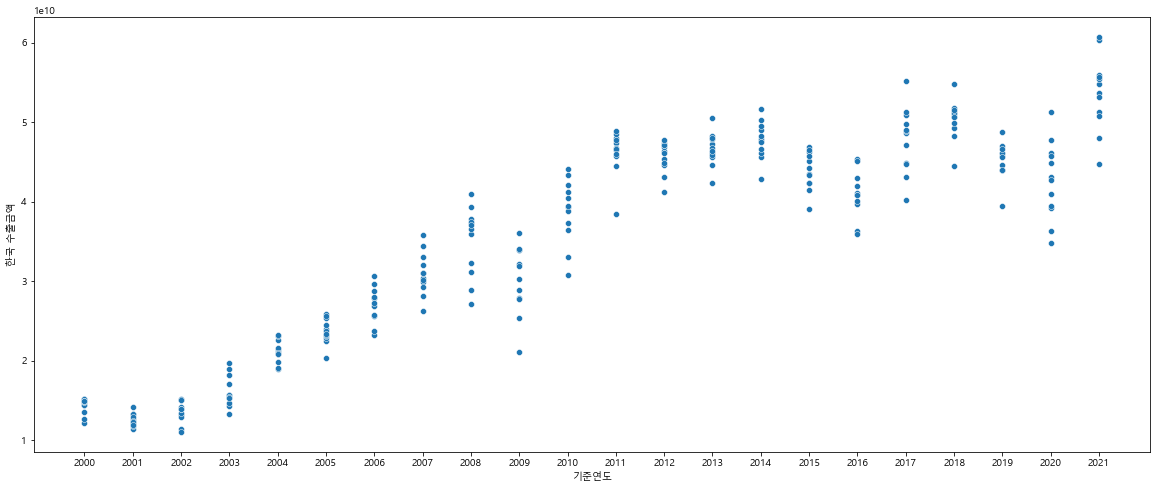

In [81]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['한국 수출금액'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='한국의대중국수출'>

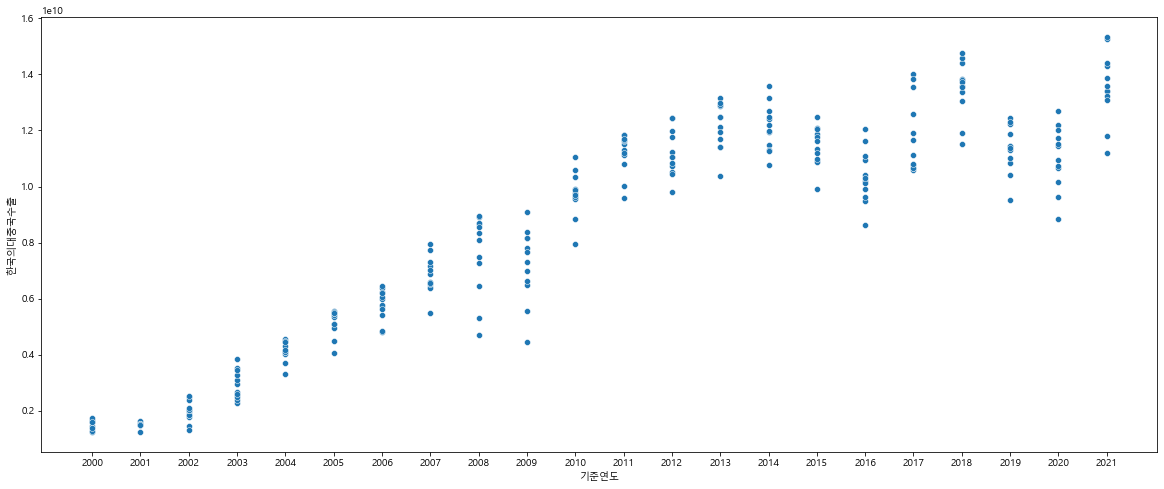

In [82]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['한국의대중국수출'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='금액_중화학'>

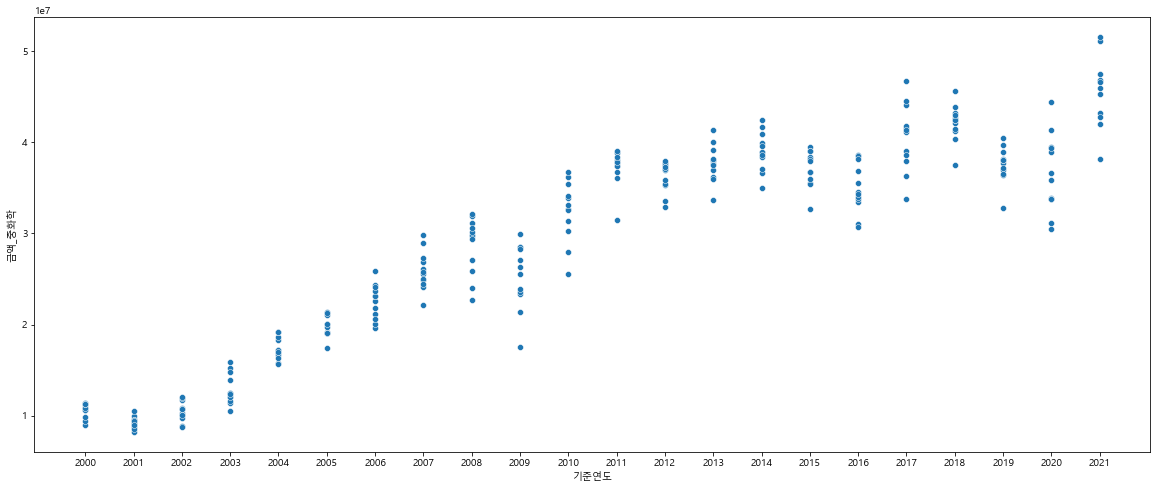

In [83]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['금액_중화학'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='생산자_공산품'>

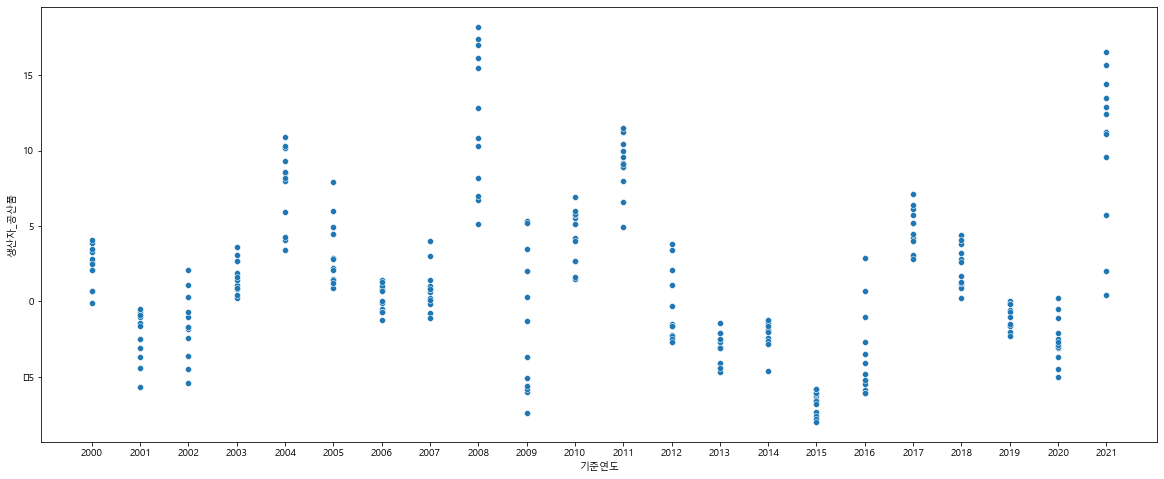

In [84]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['생산자_공산품'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='생산자_총지수'>

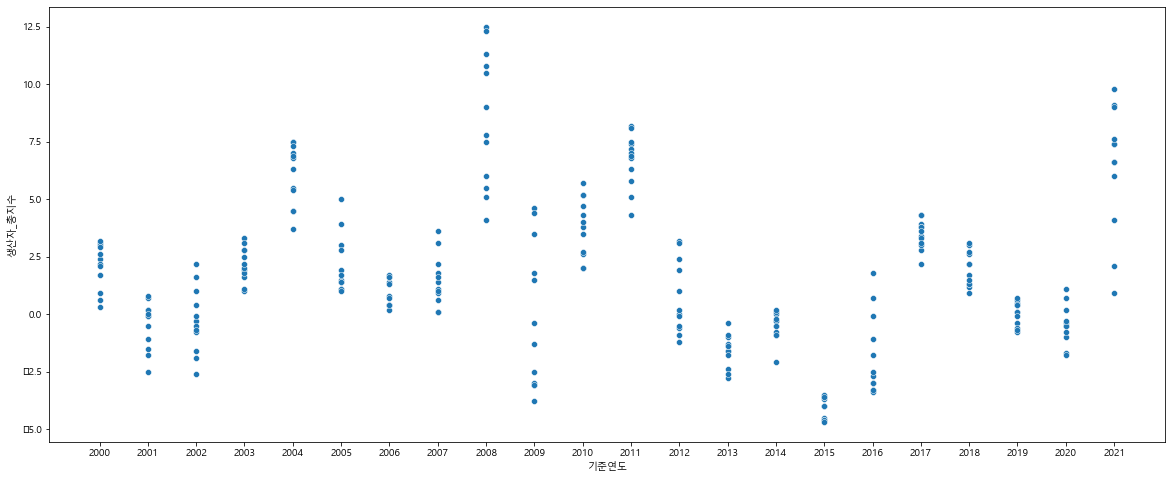

In [85]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '생산자_총지수'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='원/달러'>

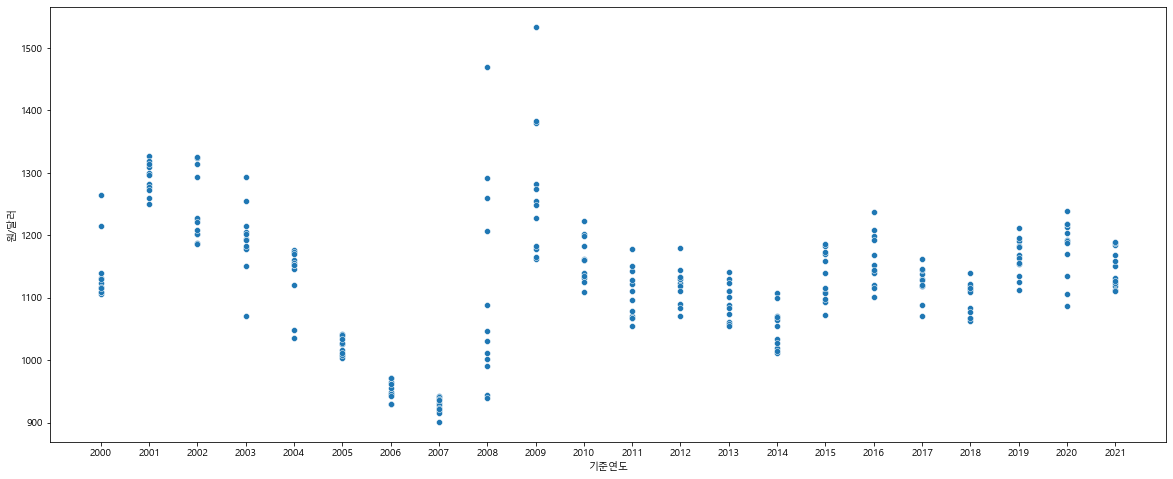

In [86]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['원/달러'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='한국의대일본수출'>

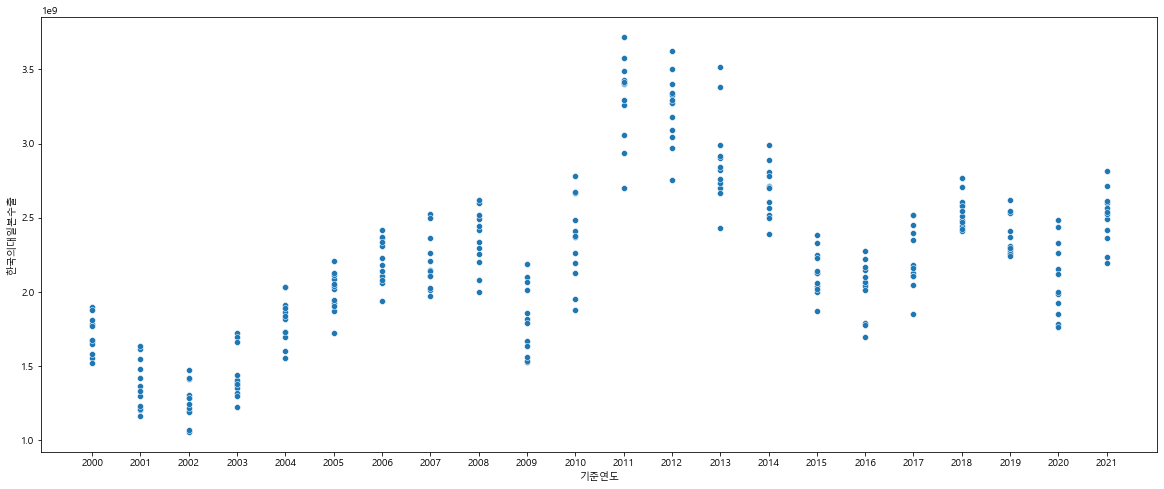

In [87]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[  '한국의대일본수출'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='금액_경공품'>

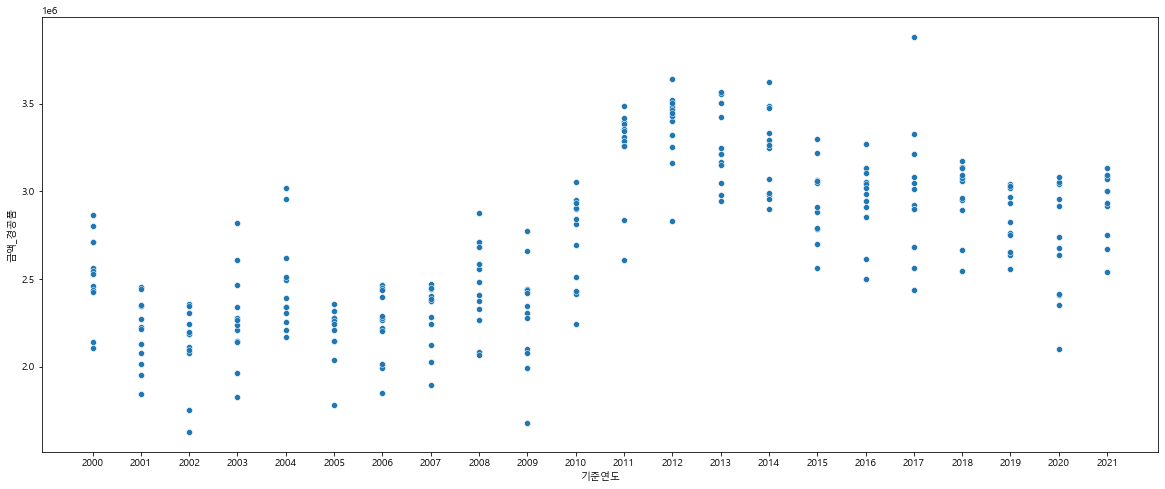

In [88]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '금액_경공품'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='한국의대미국수출'>

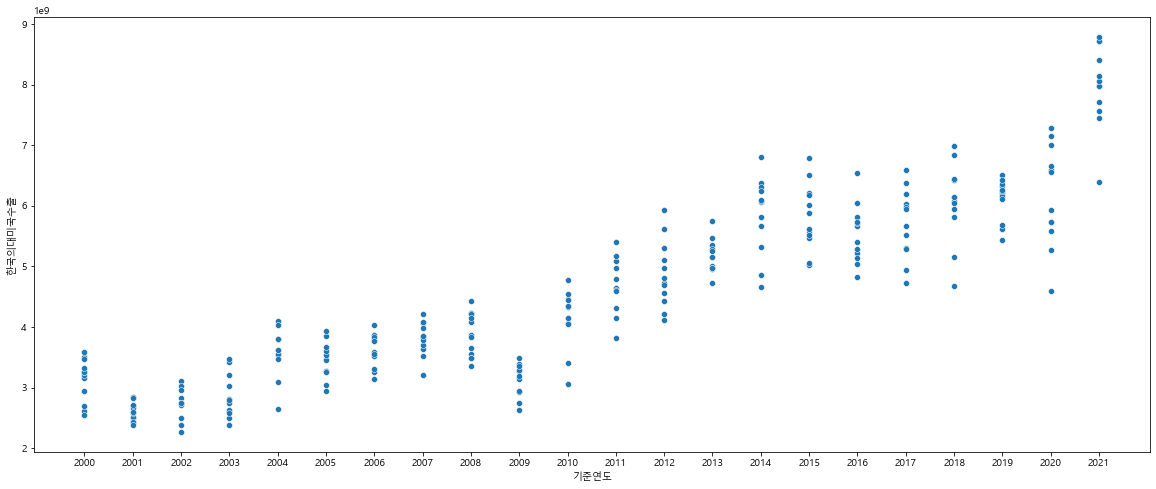

In [89]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '한국의대미국수출'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='한국의대베트남수출'>

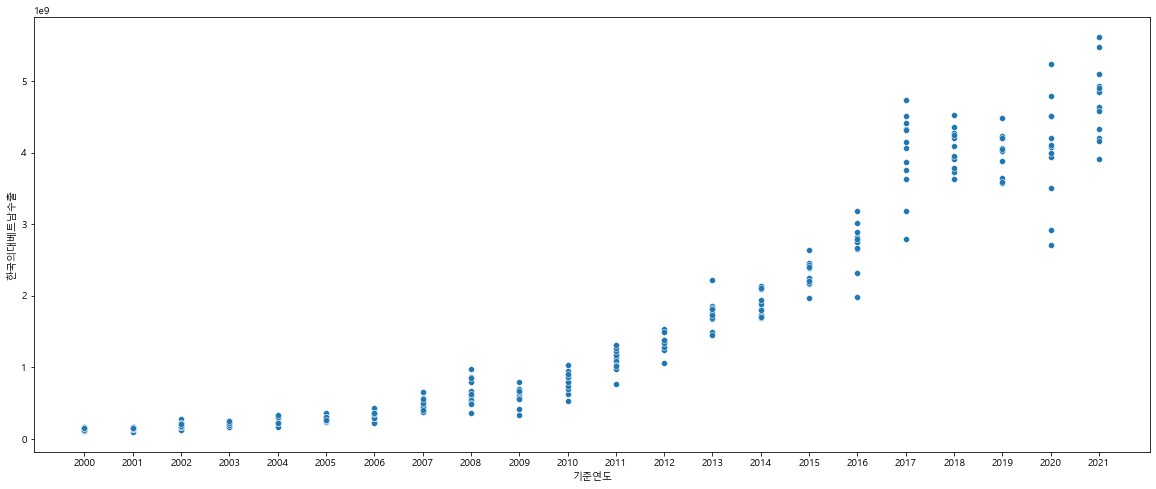

In [90]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '한국의대베트남수출'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='한국의대홍콩수출'>

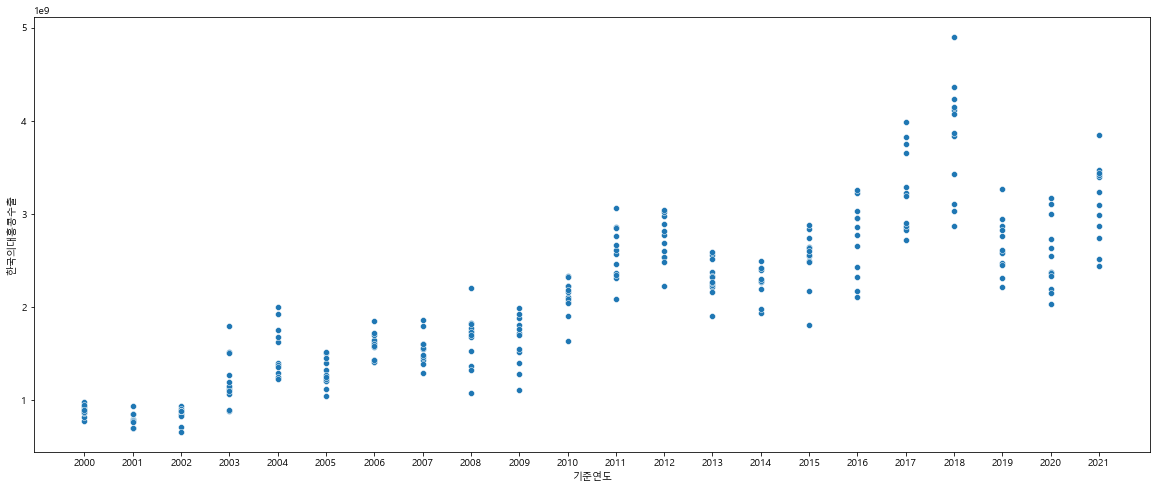

In [91]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[  '한국의대홍콩수출'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='생산자_서비스'>

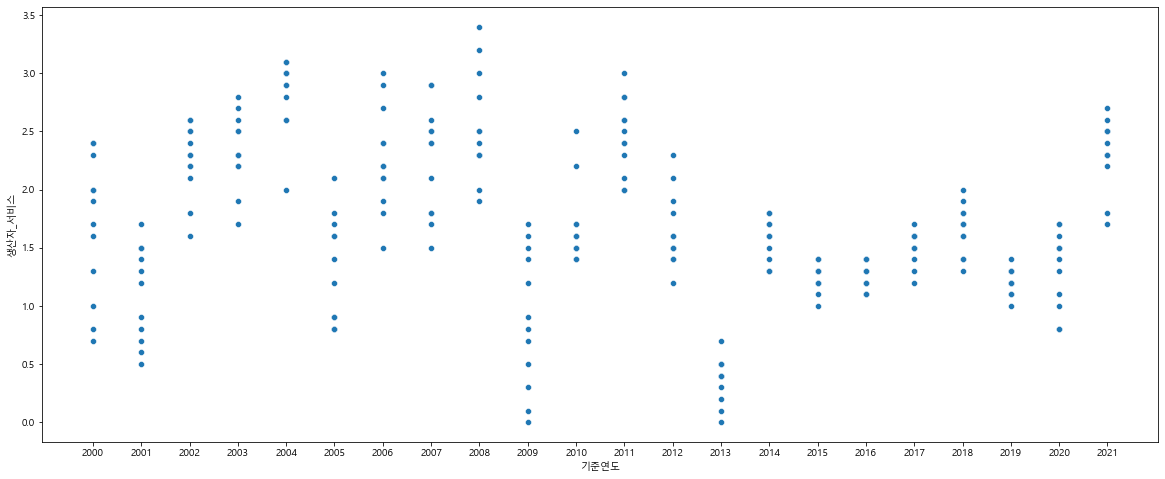

In [92]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '생산자_서비스'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='평균기온(℃)'>

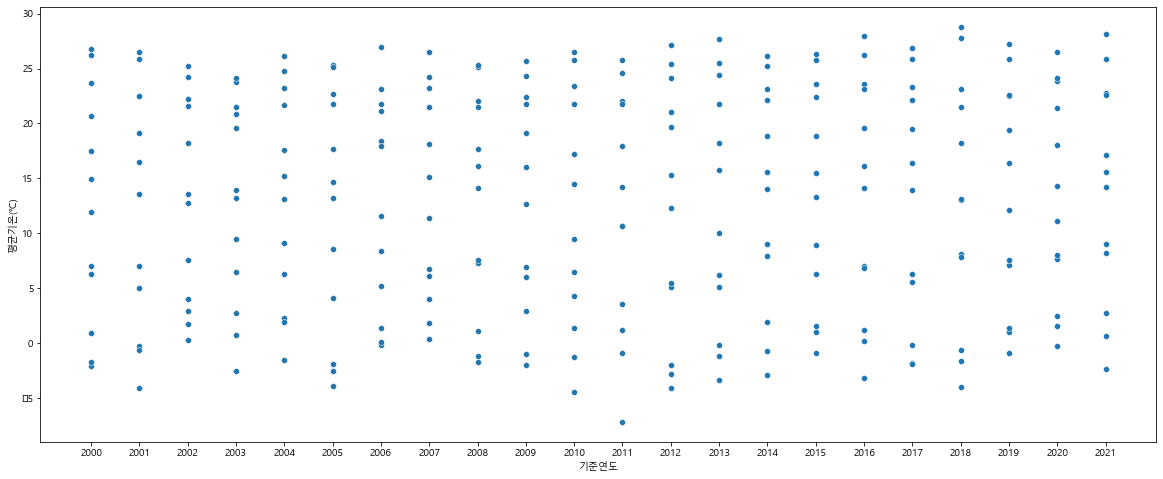

In [93]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[  '평균기온(℃)'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='-\xa0공업제품'>

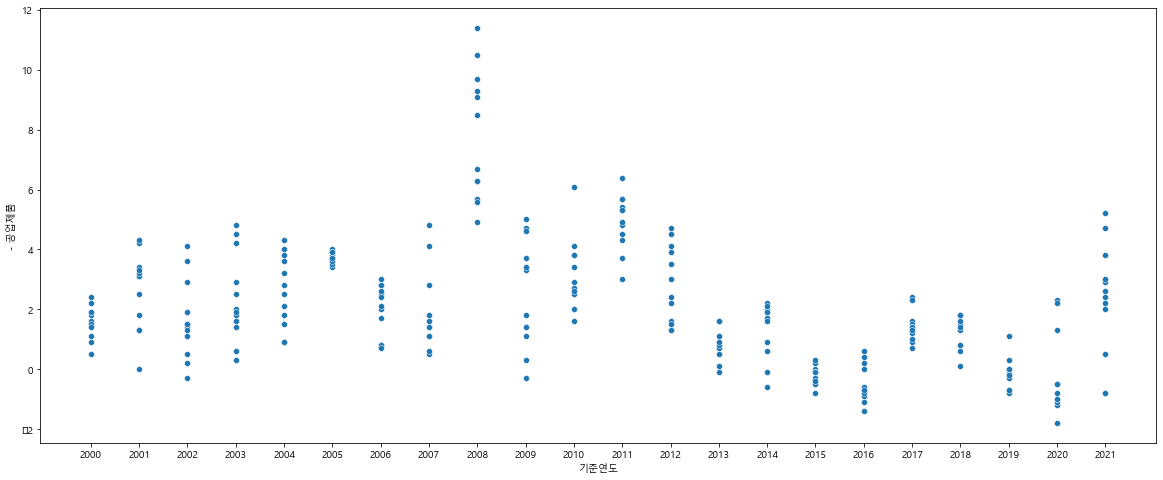

In [94]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '-\xa0공업제품'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='중량_중화학'>

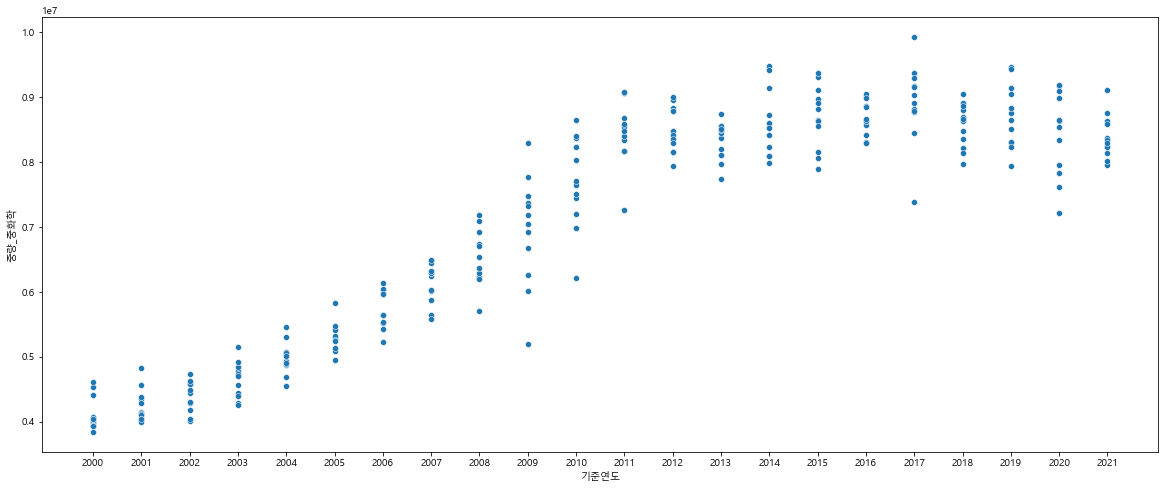

In [95]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '중량_중화학'], data= data_f)

In [96]:
data_f.columns

Index(['한국 수출금액', '한국의대중국수출', '한국의대미국수출', '한국의대베트남수출', '한국의대홍콩수출', '한국의대일본수출',
       '기준연도', '기준월', '반도체(억불)', '메모리(억불)', '메모리_D램(억불)', '메모리_낸드(억불)',
       '메모리_MCP(억불)', '시스템_반도체(억불)', '개별소자(억불)', '디스플레이_패널(억불)', '수출수량(대)',
       '수출금액(천달러)', '생산수량(대)', '원/달러', '엔/달러', '원/100엔', 'GDP', '평균기온(℃)',
       '- 개인서비스', '- 공공서비스', '- 공업제품', '- 농축수산물', '- 집세', '근원물가', '생활물가',
       '소비자물가', '생산자_공산품', '생산자_농림수산품', '생산자_서비스', '생산자_전력,가스및수도', '생산자_총지수',
       '고급휘발유', '보통휘발유', '자동차용경유', '실내등유', 'CD 91물(평균)', '국고채 3년(평균)',
       '국고채 5년(평균)', '기준금리', '콜금리(1일물,평균)', '회사채 3년(평균)', '코로나확진자 수', '중량_식료',
       '금액_식료', '중량_원료', '금액_원료', '중량_경공품', '금액_경공품', '중량_중화학', '금액_중화학',
       'LPI 점수', '물류인프라 점수'],
      dtype='object')

<AxesSubplot:xlabel='기준연도', ylabel='GDP'>

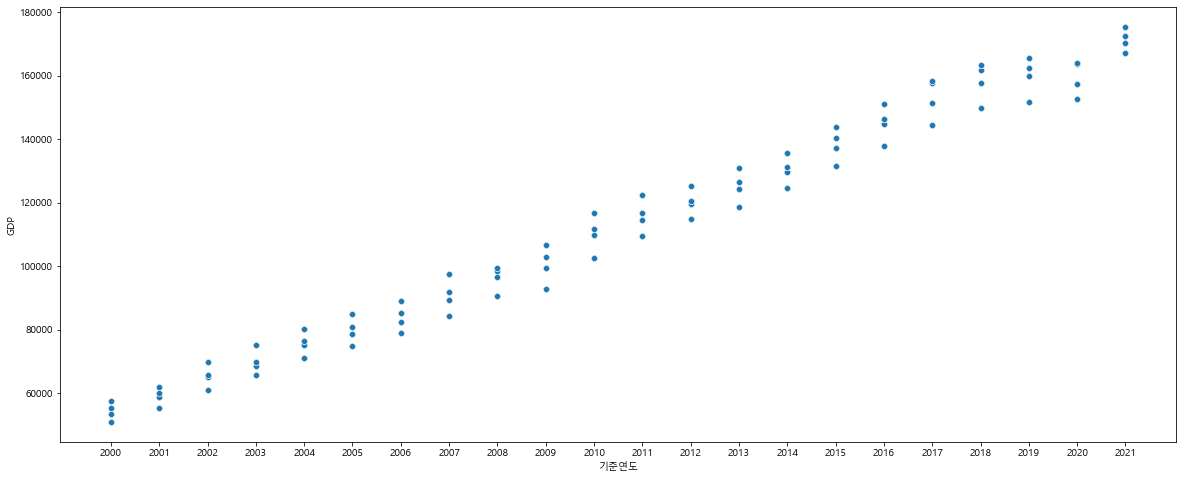

In [97]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ 'GDP'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='원/100엔'>

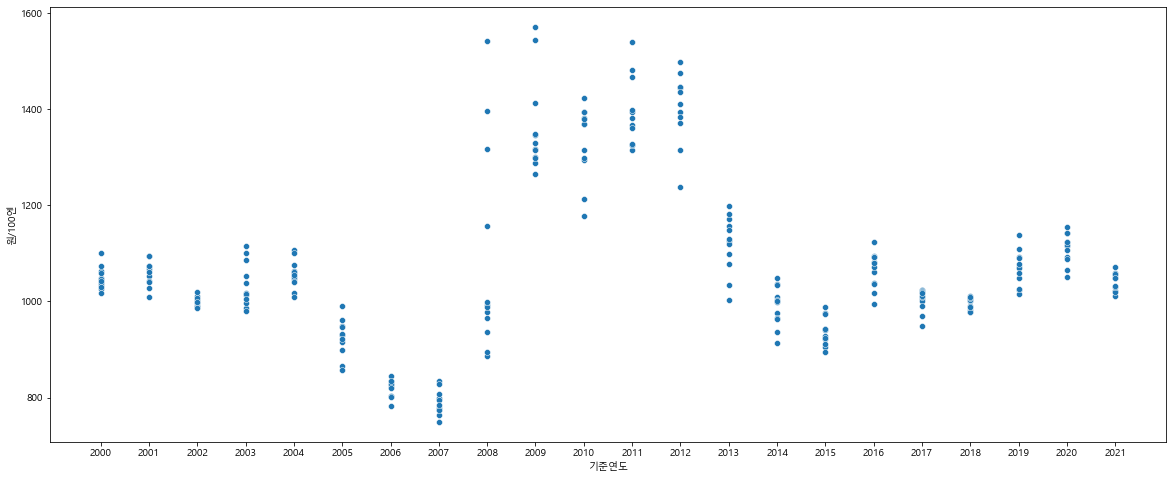

In [98]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[  '원/100엔'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='금액_원료'>

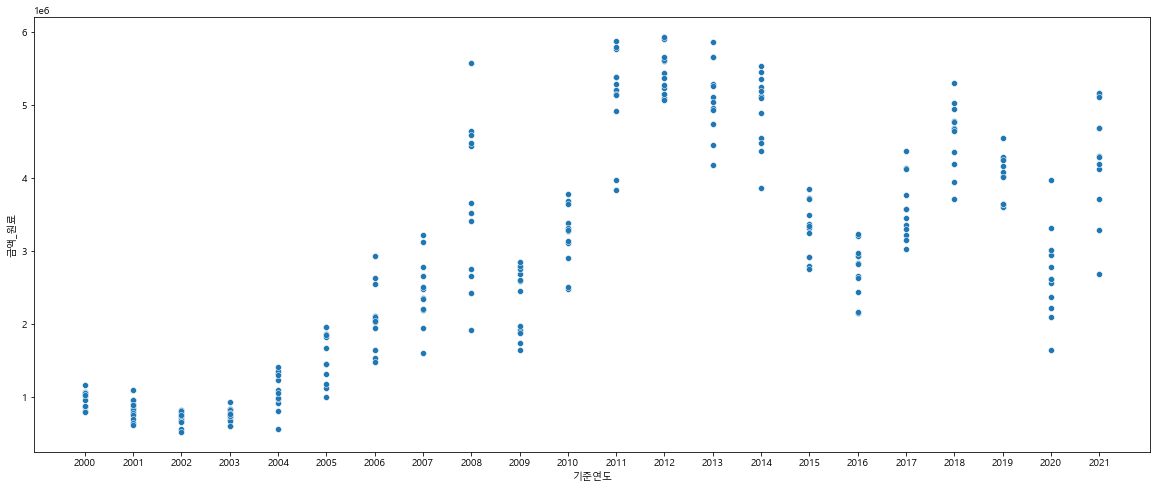

In [99]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '금액_원료'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='엔/달러'>

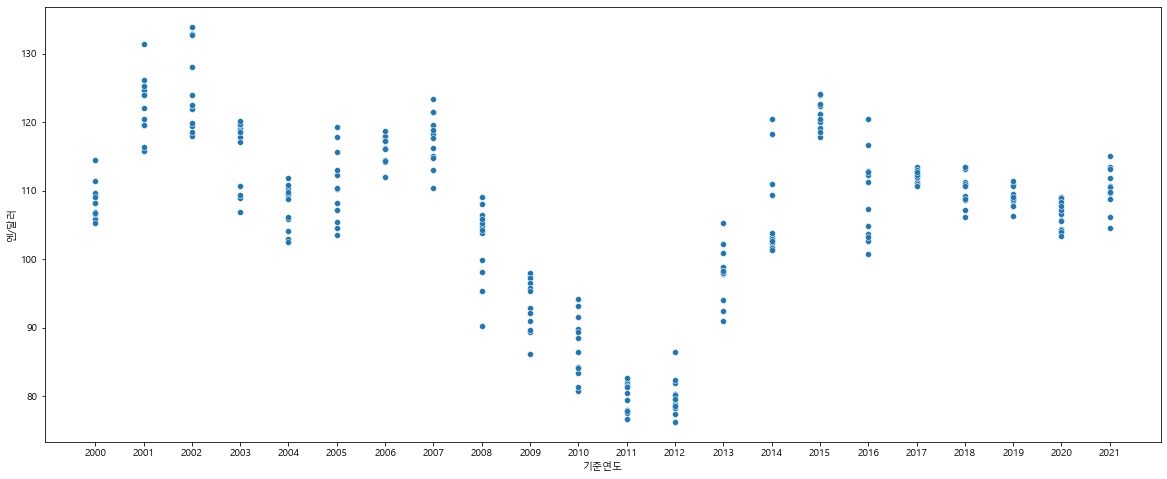

In [100]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[  '엔/달러'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='금액_식료'>

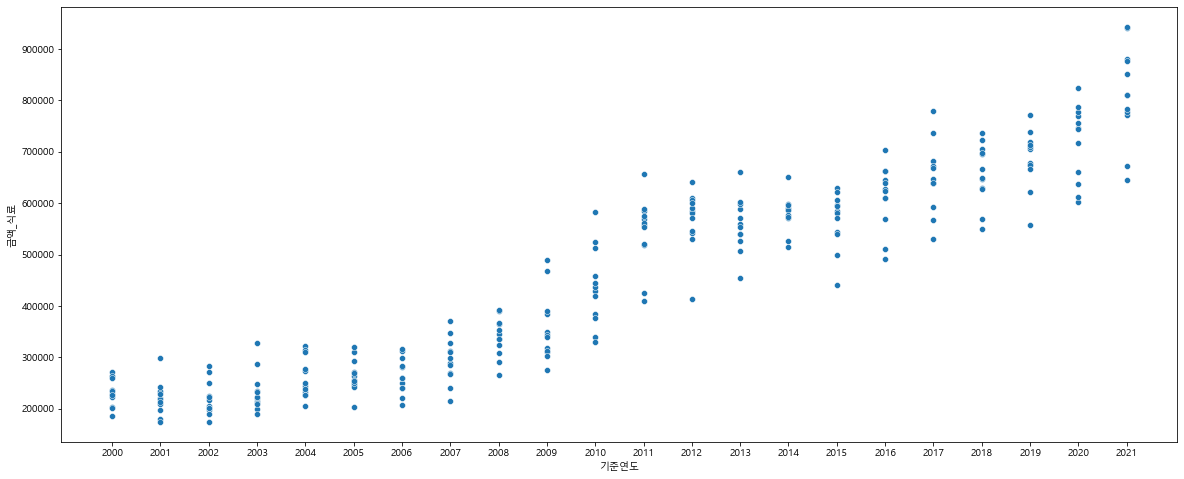

In [101]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '금액_식료'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='LPI 점수'>

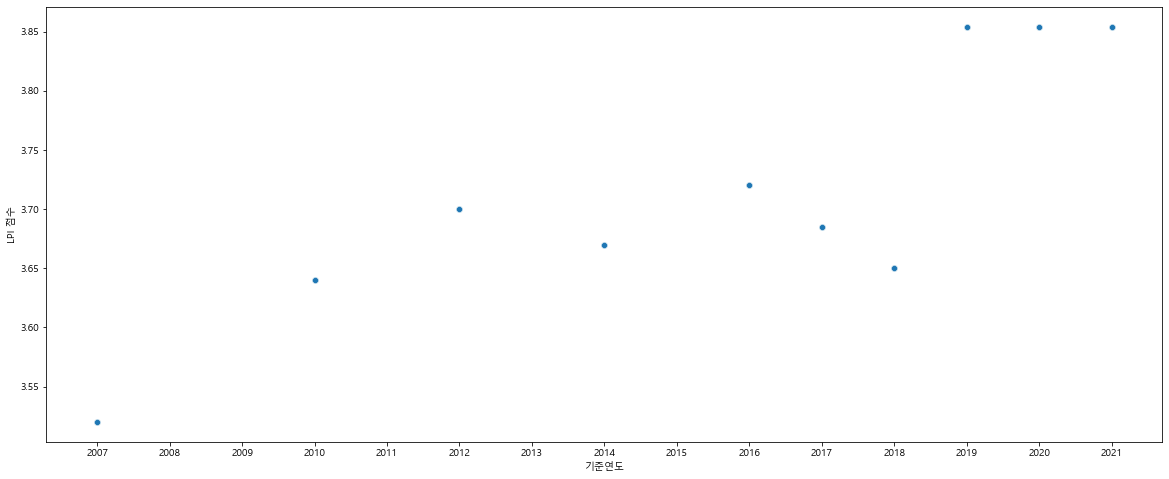

In [102]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['LPI 점수'], data= data_f)

<AxesSubplot:xlabel='기준연도', ylabel='물류인프라 점수'>

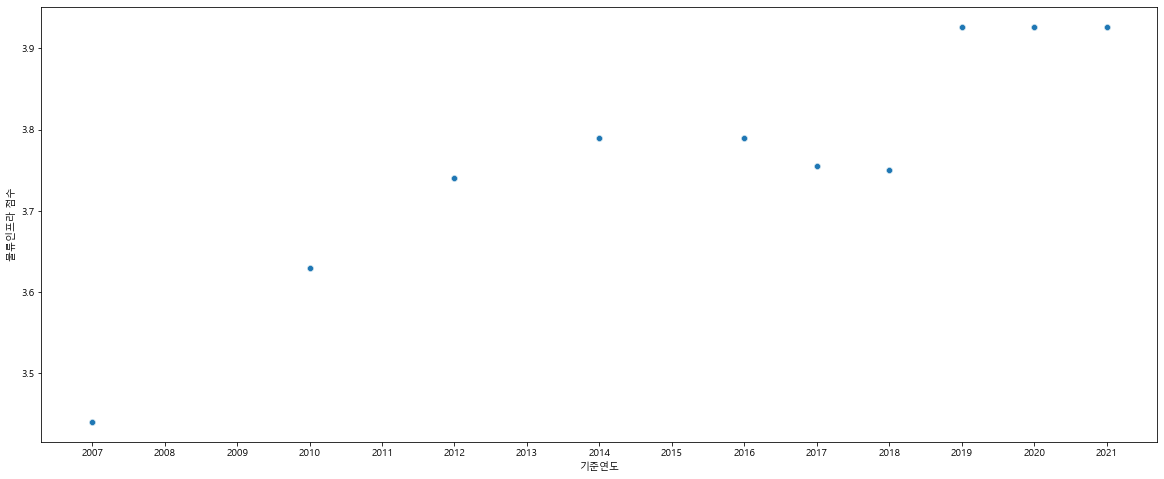

In [103]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f['물류인프라 점수'], data= data_f)

In [104]:
data_f.columns

Index(['한국 수출금액', '한국의대중국수출', '한국의대미국수출', '한국의대베트남수출', '한국의대홍콩수출', '한국의대일본수출',
       '기준연도', '기준월', '반도체(억불)', '메모리(억불)', '메모리_D램(억불)', '메모리_낸드(억불)',
       '메모리_MCP(억불)', '시스템_반도체(억불)', '개별소자(억불)', '디스플레이_패널(억불)', '수출수량(대)',
       '수출금액(천달러)', '생산수량(대)', '원/달러', '엔/달러', '원/100엔', 'GDP', '평균기온(℃)',
       '- 개인서비스', '- 공공서비스', '- 공업제품', '- 농축수산물', '- 집세', '근원물가', '생활물가',
       '소비자물가', '생산자_공산품', '생산자_농림수산품', '생산자_서비스', '생산자_전력,가스및수도', '생산자_총지수',
       '고급휘발유', '보통휘발유', '자동차용경유', '실내등유', 'CD 91물(평균)', '국고채 3년(평균)',
       '국고채 5년(평균)', '기준금리', '콜금리(1일물,평균)', '회사채 3년(평균)', '코로나확진자 수', '중량_식료',
       '금액_식료', '중량_원료', '금액_원료', '중량_경공품', '금액_경공품', '중량_중화학', '금액_중화학',
       'LPI 점수', '물류인프라 점수'],
      dtype='object')

<AxesSubplot:xlabel='기준연도', ylabel='-\xa0공공서비스'>

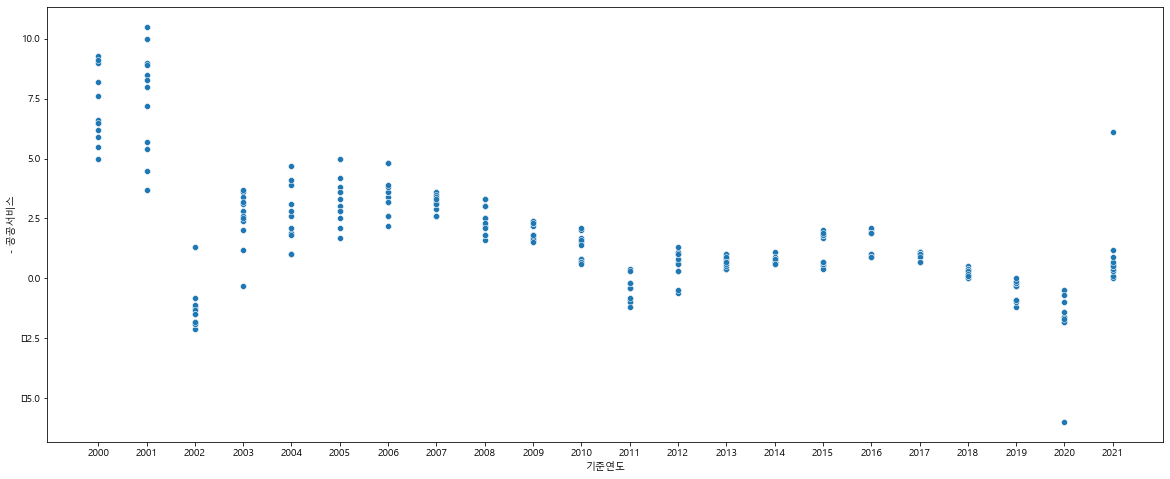

In [105]:
plt.subplots(figsize = (20,8))
sns.scatterplot(x=data_f['기준연도'],y=data_f[ '-\xa0공공서비스'], data= data_f)

sns.kdeplot(x=data_f['한국 수출금액'])

In [137]:
data_f['기준연도'] =data_f['기준연도'].astype('int')

In [138]:
data_m = data_f[data_f['기준연도'] >= 2017]

In [139]:
data_m['기준연도'].value_counts()

2017    12
2018    12
2019    12
2020    12
2021    12
Name: 기준연도, dtype: int64

## 모델링

In [140]:
y = data_m['한국 수출금액']
X = data_m.loc[:, data_m.columns != '한국 수출금액']

In [141]:
X.isnull().sum().sum()

0

In [142]:
X = X.drop(['기준연도', '기준월'],1)

In [143]:
y.isnull().sum()

0

In [144]:
# 범주형 변수 원-핫 인코딩

cat_features = list(X.select_dtypes(include=['object']).columns)
num_features = [c for c in X.columns.tolist() if c not in cat_features]

if len(cat_features) > 0:
    X = pd.concat([X[num_features], pd.get_dummies(X[cat_features])], axis=1)
X.head()

,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출,반도체(억불),메모리(억불),메모리_D램(억불),메모리_낸드(억불),메모리_MCP(억불),...,중량_식료,금액_식료,중량_원료,금액_원료,중량_경공품,금액_경공품,중량_중화학,금액_중화학,LPI 점수,물류인프라 점수
204,10754709285,4940100924,2791265431,2721286087,2130047971,63.2,40.8,17.6,3.0,11.7,...,257361.9,529618,6100051.2,3352848,1084575.4,2560928,8768850.1,33813606,3.685,3.755
205,11118131308,5312452585,3181296752,2854472744,2044853150,64.0,41.9,17.7,3.0,12.5,...,247514.4,592071,6283558.7,3585002,1162893.5,2683091,8453489.6,36306373,3.685,3.755
206,11655510517,6200928199,4330456598,3223394812,2395932082,74.9,49.3,20.0,3.4,16.2,...,291482.2,681290,6847353.3,3772696,1219164.2,3078649,9168032.5,41105197,3.685,3.755
207,10589663918,6035663101,4517085112,2828098062,2108329954,71.4,47.5,21.8,3.3,13.4,...,260189.2,638529,5567679.7,3215312,1005930.8,2924409,8908146.2,44065549,3.685,3.755
208,10652551536,5523901512,4153353121,2873922510,2182625743,75.1,49.0,23.5,3.1,14.4,...,271379.2,638375,6468210.8,3461194,934614.3,2899479,8822341.1,37927931,3.685,3.755


In [114]:
scaler_ = StandardScaler()
scaler_.fit(X)
X_scaled_ = scaler_.transform(X)

#print(X_scaled_ )
#print(f"최소\n{X_scaled_.min()}")
#print(f"최대\n{X_scaled_.max()}")




#scaler = StandardScaler()
#X[num_features] = scaler.fit_transform(X[num_features]) 


In [145]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, random_state = 2022)

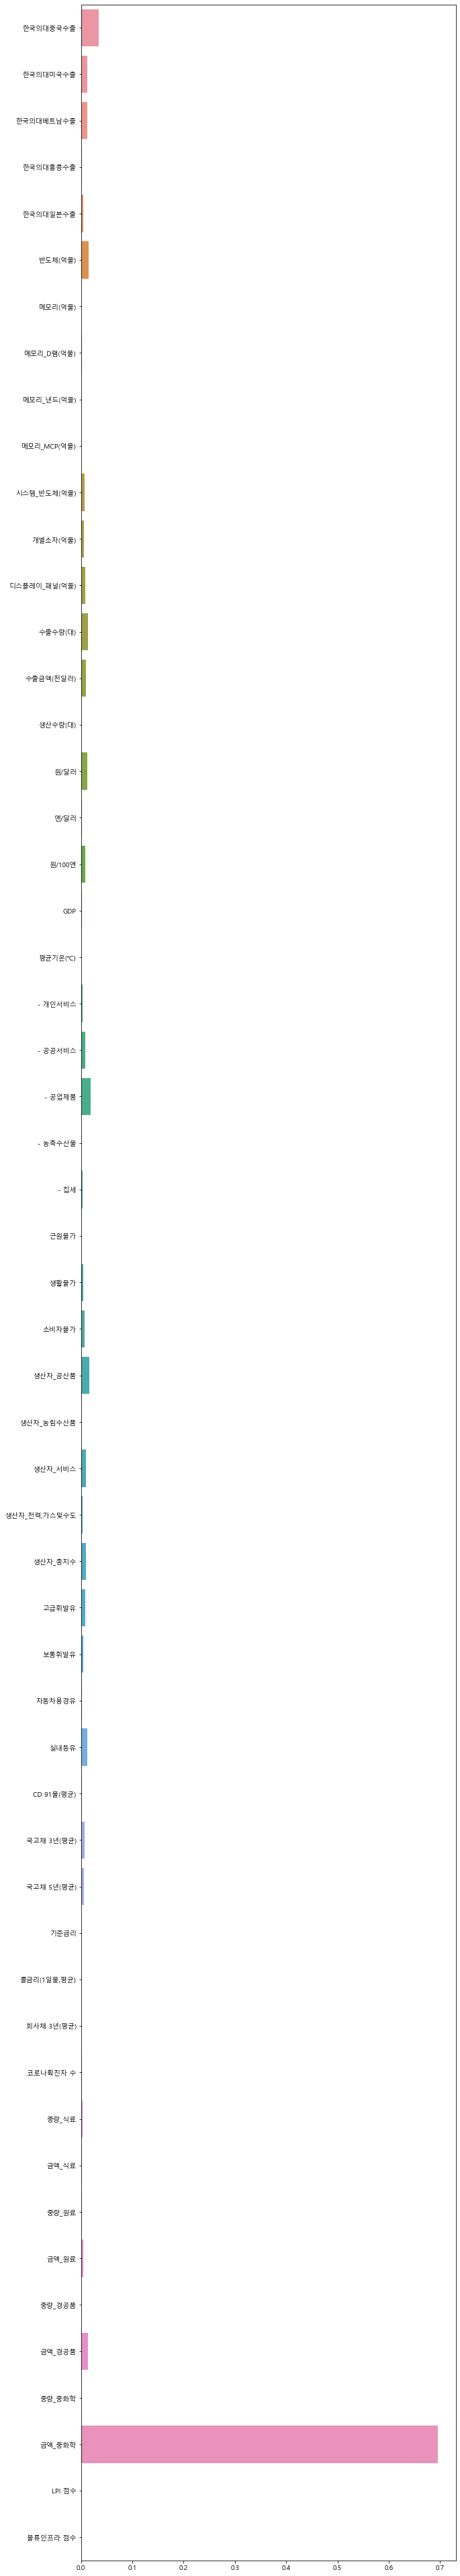

In [116]:
plt.rcParams["font.family"] = "Malgun Gothic"
clf = RandomForestRegressor().fit(X_train, y_train)
plt.figure(figsize=(10,70))
f = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
plt.show()

In [117]:
feat_labels = X_train.columns

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 금액_중화학                         0.695797
 2) 한국의대중국수출                       0.034385
 3) - 공업제품                         0.018328
 4) 생산자_공산품                        0.016483
 5) 반도체(억불)                        0.014399
 6) 수출수량(대)                        0.013391
 7) 금액_경공품                         0.013055
 8) 한국의대베트남수출                      0.012418
 9) 실내등유                           0.012198
10) 원/달러                           0.011796
11) 한국의대미국수출                       0.011640
12) 생산자_서비스                        0.009706
13) 수출금액(천달러)                      0.009705
14) 생산자_총지수                        0.009670
15) 고급휘발유                          0.008837
16) - 공공서비스                        0.008659
17) 원/100엔                         0.008439
18) 디스플레이_패널(억불)                   0.007931
19) 시스템_반도체(억불)                    0.006856
20) 소비자물가                          0.006804
21) 국고채 3년(평균)                     0.006633
22) 국고채 5년(평균)                     0.006002
23) 개별소자(억불)                    

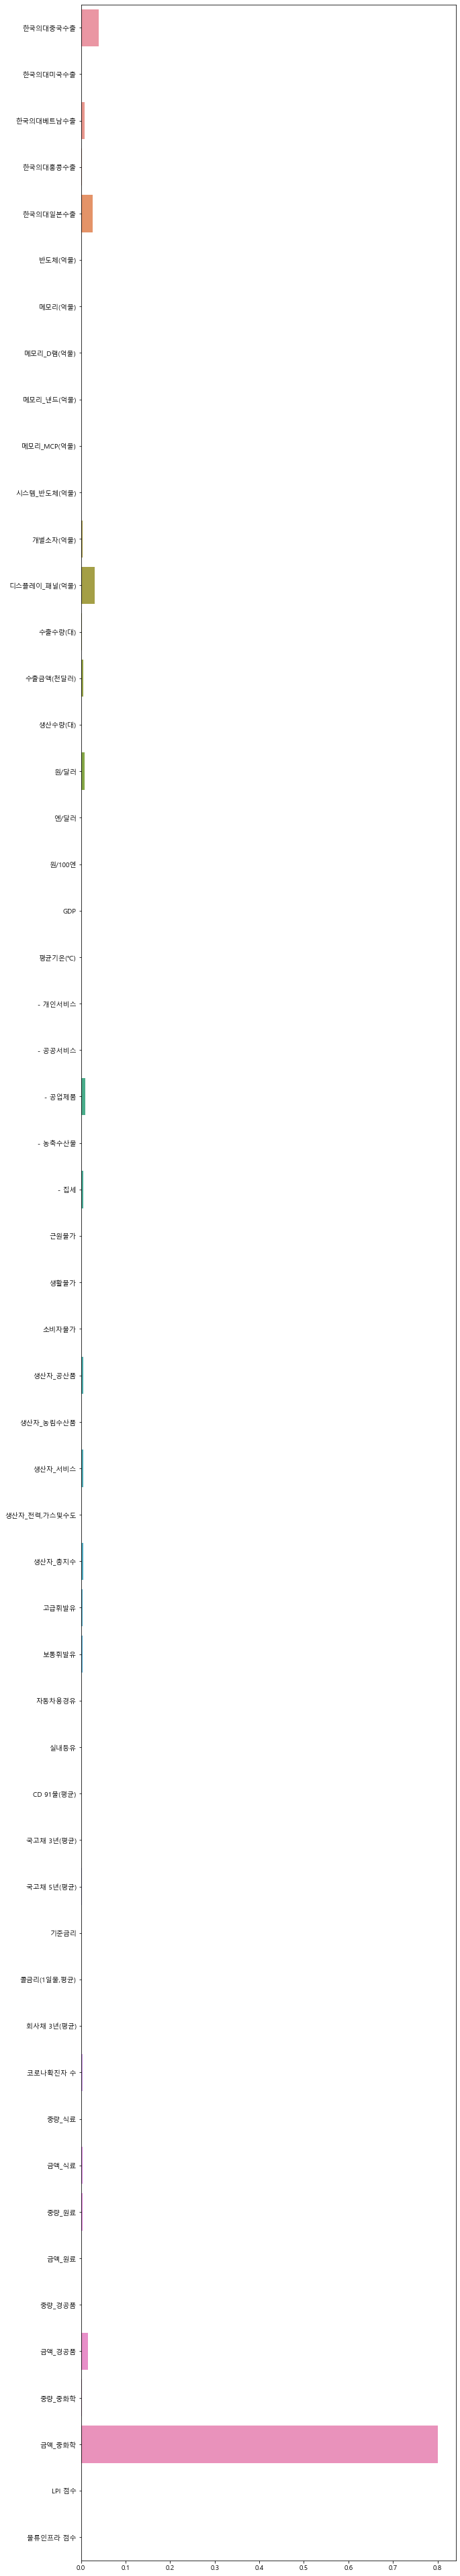

In [118]:
clf = GradientBoostingRegressor().fit(X_train, y_train)
plt.figure(figsize=(10,70))
f = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
plt.show()

In [119]:
feat_labels = X_train.columns

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 금액_중화학                         0.800930
 2) 한국의대중국수출                       0.039597
 3) 디스플레이_패널(억불)                   0.030403
 4) 한국의대일본수출                       0.025641
 5) 금액_경공품                         0.015322
 6) - 공업제품                         0.009631
 7) 원/달러                           0.008544
 8) 한국의대베트남수출                      0.008214
 9) 생산자_총지수                        0.005557
10) 수출금액(천달러)                      0.005543
11) - 집세                           0.005407
12) 생산자_서비스                        0.005119
13) 생산자_공산품                        0.004402
14) 고급휘발유                          0.004166
15) 코로나확진자 수                       0.004063
16) 보통휘발유                          0.004030
17) 금액_식료                          0.003623
18) 중량_원료                          0.003473
19) 개별소자(억불)                       0.002870
20) 중량_중화학                         0.002312
21) 한국의대홍콩수출                       0.001896
22) 수출수량(대)                        0.001825
23) 국고채 5년(평균)                  

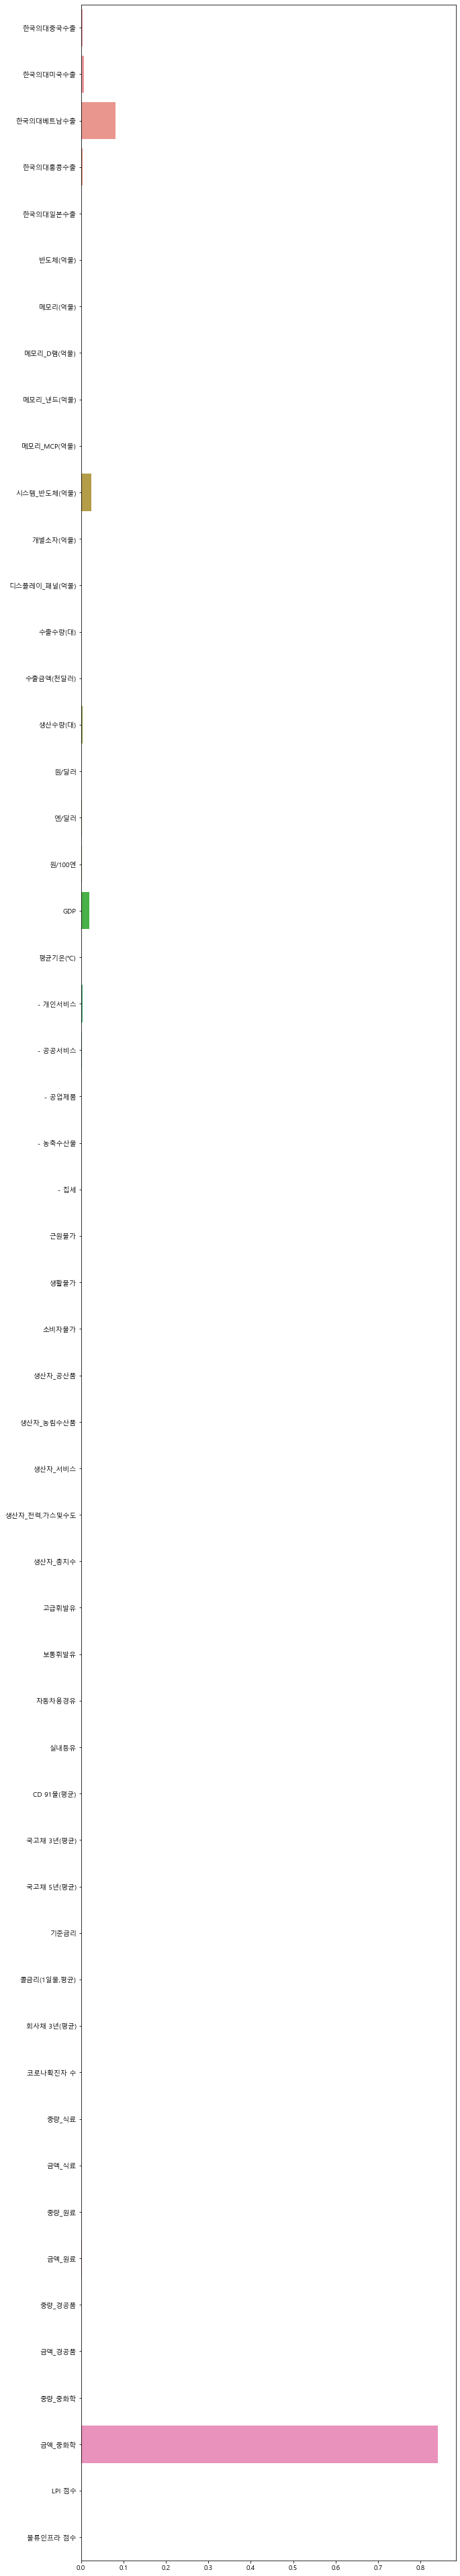

In [120]:
clf = XGBRegressor().fit(X_train, y_train)
plt.figure(figsize=(10,70))
f = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
plt.show()


In [121]:
feat_labels = X_train.columns

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 금액_중화학                         0.841054
 2) 한국의대베트남수출                      0.080975
 3) 시스템_반도체(억불)                    0.024515
 4) GDP                            0.019449
 5) 한국의대미국수출                       0.006581
 6) 한국의대중국수출                       0.004154
 7) - 개인서비스                        0.003903
 8) 생산수량(대)                        0.003262
 9) 한국의대홍콩수출                       0.002988
10) 금액_원료                          0.002723
11) 원/100엔                         0.002074
12) - 공공서비스                        0.001662
13) 엔/달러                           0.001642
14) 금액_식료                          0.001184
15) 금액_경공품                         0.000974
16) 생활물가                           0.000674
17) 메모리(억불)                        0.000565
18) 생산자_농림수산품                      0.000458
19) 중량_중화학                         0.000362
20) 수출금액(천달러)                      0.000278
21) 개별소자(억불)                       0.000168
22) 메모리_MCP(억불)                    0.000085
23) 국고채 5년(평균)                  

Learning rate set to 0.024811
0:	learn: 5051790496.0683918	total: 168ms	remaining: 2m 48s
1:	learn: 5013264774.3979053	total: 181ms	remaining: 1m 30s
2:	learn: 4960936996.2946148	total: 189ms	remaining: 1m 2s
3:	learn: 4906075306.2439556	total: 196ms	remaining: 48.8s
4:	learn: 4862239228.2923412	total: 205ms	remaining: 40.7s
5:	learn: 4815132073.6162939	total: 210ms	remaining: 34.9s
6:	learn: 4763355173.7914734	total: 217ms	remaining: 30.8s
7:	learn: 4714854891.6338587	total: 224ms	remaining: 27.7s
8:	learn: 4659522124.6027431	total: 227ms	remaining: 25s
9:	learn: 4616832283.4315519	total: 236ms	remaining: 23.4s
10:	learn: 4570297621.8340540	total: 243ms	remaining: 21.8s
11:	learn: 4525972408.3747644	total: 251ms	remaining: 20.6s
12:	learn: 4479633396.4105635	total: 255ms	remaining: 19.4s
13:	learn: 4426581467.7439308	total: 258ms	remaining: 18.2s
14:	learn: 4374614010.9076233	total: 263ms	remaining: 17.3s
15:	learn: 4329633555.5839844	total: 270ms	remaining: 16.6s
16:	learn: 428041025

148:	learn: 1295519774.8984580	total: 840ms	remaining: 4.8s
149:	learn: 1283947468.5535278	total: 843ms	remaining: 4.78s
150:	learn: 1275516714.2365792	total: 845ms	remaining: 4.75s
151:	learn: 1265569447.5225525	total: 850ms	remaining: 4.74s
152:	learn: 1257219601.5099027	total: 853ms	remaining: 4.72s
153:	learn: 1245157980.0646181	total: 856ms	remaining: 4.71s
154:	learn: 1234183857.1125748	total: 859ms	remaining: 4.68s
155:	learn: 1224545353.3276772	total: 862ms	remaining: 4.66s
156:	learn: 1216112699.4616327	total: 865ms	remaining: 4.64s
157:	learn: 1206523962.7778447	total: 868ms	remaining: 4.63s
158:	learn: 1201302777.4786944	total: 873ms	remaining: 4.62s
159:	learn: 1192601222.5757508	total: 877ms	remaining: 4.61s
160:	learn: 1187169658.8095901	total: 882ms	remaining: 4.59s
161:	learn: 1180559498.3199756	total: 891ms	remaining: 4.61s
162:	learn: 1168588168.2290711	total: 902ms	remaining: 4.63s
163:	learn: 1158562760.5584576	total: 906ms	remaining: 4.62s
164:	learn: 1151109100.42

321:	learn: 402874236.5706977	total: 1.34s	remaining: 2.83s
322:	learn: 401026329.2905847	total: 1.34s	remaining: 2.82s
323:	learn: 398755280.3544909	total: 1.35s	remaining: 2.81s
324:	learn: 395649288.2576408	total: 1.35s	remaining: 2.8s
325:	learn: 393507147.4023820	total: 1.35s	remaining: 2.8s
326:	learn: 390290824.1999978	total: 1.36s	remaining: 2.8s
327:	learn: 388606101.3486553	total: 1.36s	remaining: 2.8s
328:	learn: 386574585.7638167	total: 1.37s	remaining: 2.79s
329:	learn: 384566030.2685537	total: 1.37s	remaining: 2.79s
330:	learn: 381750804.3597244	total: 1.37s	remaining: 2.78s
331:	learn: 379002912.1695698	total: 1.38s	remaining: 2.77s
332:	learn: 376855882.3772771	total: 1.38s	remaining: 2.76s
333:	learn: 375312603.4162576	total: 1.38s	remaining: 2.76s
334:	learn: 372398814.2845932	total: 1.39s	remaining: 2.75s
335:	learn: 370416929.7994744	total: 1.39s	remaining: 2.74s
336:	learn: 367548425.2624835	total: 1.39s	remaining: 2.73s
337:	learn: 365892081.7536220	total: 1.39s	r

466:	learn: 168343242.5539106	total: 1.68s	remaining: 1.91s
467:	learn: 166924904.2631297	total: 1.68s	remaining: 1.91s
468:	learn: 165601080.0216653	total: 1.68s	remaining: 1.91s
469:	learn: 165081043.9676576	total: 1.69s	remaining: 1.9s
470:	learn: 163885126.8067326	total: 1.69s	remaining: 1.9s
471:	learn: 162367044.5854684	total: 1.69s	remaining: 1.89s
472:	learn: 161801575.4630421	total: 1.7s	remaining: 1.89s
473:	learn: 161200124.8524658	total: 1.7s	remaining: 1.88s
474:	learn: 159707994.6803288	total: 1.7s	remaining: 1.88s
475:	learn: 159095475.9957387	total: 1.7s	remaining: 1.88s
476:	learn: 157754378.7712460	total: 1.71s	remaining: 1.87s
477:	learn: 156505689.9309509	total: 1.71s	remaining: 1.87s
478:	learn: 155923834.5552897	total: 1.71s	remaining: 1.86s
479:	learn: 155385231.2121384	total: 1.72s	remaining: 1.86s
480:	learn: 154157100.2385458	total: 1.72s	remaining: 1.86s
481:	learn: 153045272.5356153	total: 1.73s	remaining: 1.85s
482:	learn: 152516856.8705471	total: 1.73s	rem

606:	learn: 71486194.2991848	total: 2.01s	remaining: 1.3s
607:	learn: 70823613.1184905	total: 2.01s	remaining: 1.3s
608:	learn: 70602943.9087901	total: 2.02s	remaining: 1.29s
609:	learn: 70394336.7769046	total: 2.02s	remaining: 1.29s
610:	learn: 69774258.2722060	total: 2.02s	remaining: 1.28s
611:	learn: 69544095.9890253	total: 2.02s	remaining: 1.28s
612:	learn: 69339719.8372703	total: 2.02s	remaining: 1.28s
613:	learn: 69113553.0880795	total: 2.02s	remaining: 1.27s
614:	learn: 68494258.1823983	total: 2.03s	remaining: 1.27s
615:	learn: 67974364.6560360	total: 2.03s	remaining: 1.26s
616:	learn: 67696869.1334997	total: 2.03s	remaining: 1.26s
617:	learn: 67499673.1069953	total: 2.03s	remaining: 1.26s
618:	learn: 66884349.6171012	total: 2.04s	remaining: 1.25s
619:	learn: 66689618.9732559	total: 2.04s	remaining: 1.25s
620:	learn: 66471328.1939748	total: 2.04s	remaining: 1.24s
621:	learn: 66166570.5879792	total: 2.04s	remaining: 1.24s
622:	learn: 65953540.9602998	total: 2.04s	remaining: 1.24s

768:	learn: 28425130.6062463	total: 2.35s	remaining: 705ms
769:	learn: 28150148.7160607	total: 2.35s	remaining: 702ms
770:	learn: 28068042.1408548	total: 2.35s	remaining: 699ms
771:	learn: 27797736.9021816	total: 2.35s	remaining: 695ms
772:	learn: 27716741.7156429	total: 2.36s	remaining: 692ms
773:	learn: 27636450.4592889	total: 2.36s	remaining: 690ms
774:	learn: 27371110.2947731	total: 2.36s	remaining: 687ms
775:	learn: 27291891.0178270	total: 2.37s	remaining: 684ms
776:	learn: 26984984.4760859	total: 2.37s	remaining: 681ms
777:	learn: 26906717.1278630	total: 2.38s	remaining: 678ms
778:	learn: 26625559.5859587	total: 2.38s	remaining: 675ms
779:	learn: 26416722.0334992	total: 2.38s	remaining: 672ms
780:	learn: 26347024.0887409	total: 2.38s	remaining: 668ms
781:	learn: 26141618.2630705	total: 2.39s	remaining: 665ms
782:	learn: 26065284.9822248	total: 2.39s	remaining: 662ms
783:	learn: 25795325.7511829	total: 2.39s	remaining: 659ms
784:	learn: 25604594.0275701	total: 2.39s	remaining: 655

908:	learn: 12672767.9098754	total: 2.68s	remaining: 268ms
909:	learn: 12554065.4916193	total: 2.68s	remaining: 266ms
910:	learn: 12437405.4665878	total: 2.69s	remaining: 263ms
911:	learn: 12394205.7410418	total: 2.69s	remaining: 260ms
912:	learn: 12260661.2222508	total: 2.69s	remaining: 257ms
913:	learn: 12220061.1942401	total: 2.69s	remaining: 254ms
914:	learn: 12177764.5419027	total: 2.7s	remaining: 251ms
915:	learn: 12144218.7161369	total: 2.7s	remaining: 248ms
916:	learn: 12032206.4109503	total: 2.71s	remaining: 245ms
917:	learn: 11990660.9129071	total: 2.71s	remaining: 242ms
918:	learn: 11951415.5064424	total: 2.71s	remaining: 239ms
919:	learn: 11892737.9282942	total: 2.72s	remaining: 236ms
920:	learn: 11793268.3892262	total: 2.72s	remaining: 233ms
921:	learn: 11693168.0029360	total: 2.72s	remaining: 230ms
922:	learn: 11661082.9468940	total: 2.72s	remaining: 227ms
923:	learn: 11562762.5785797	total: 2.73s	remaining: 224ms
924:	learn: 11496934.2605529	total: 2.73s	remaining: 222ms

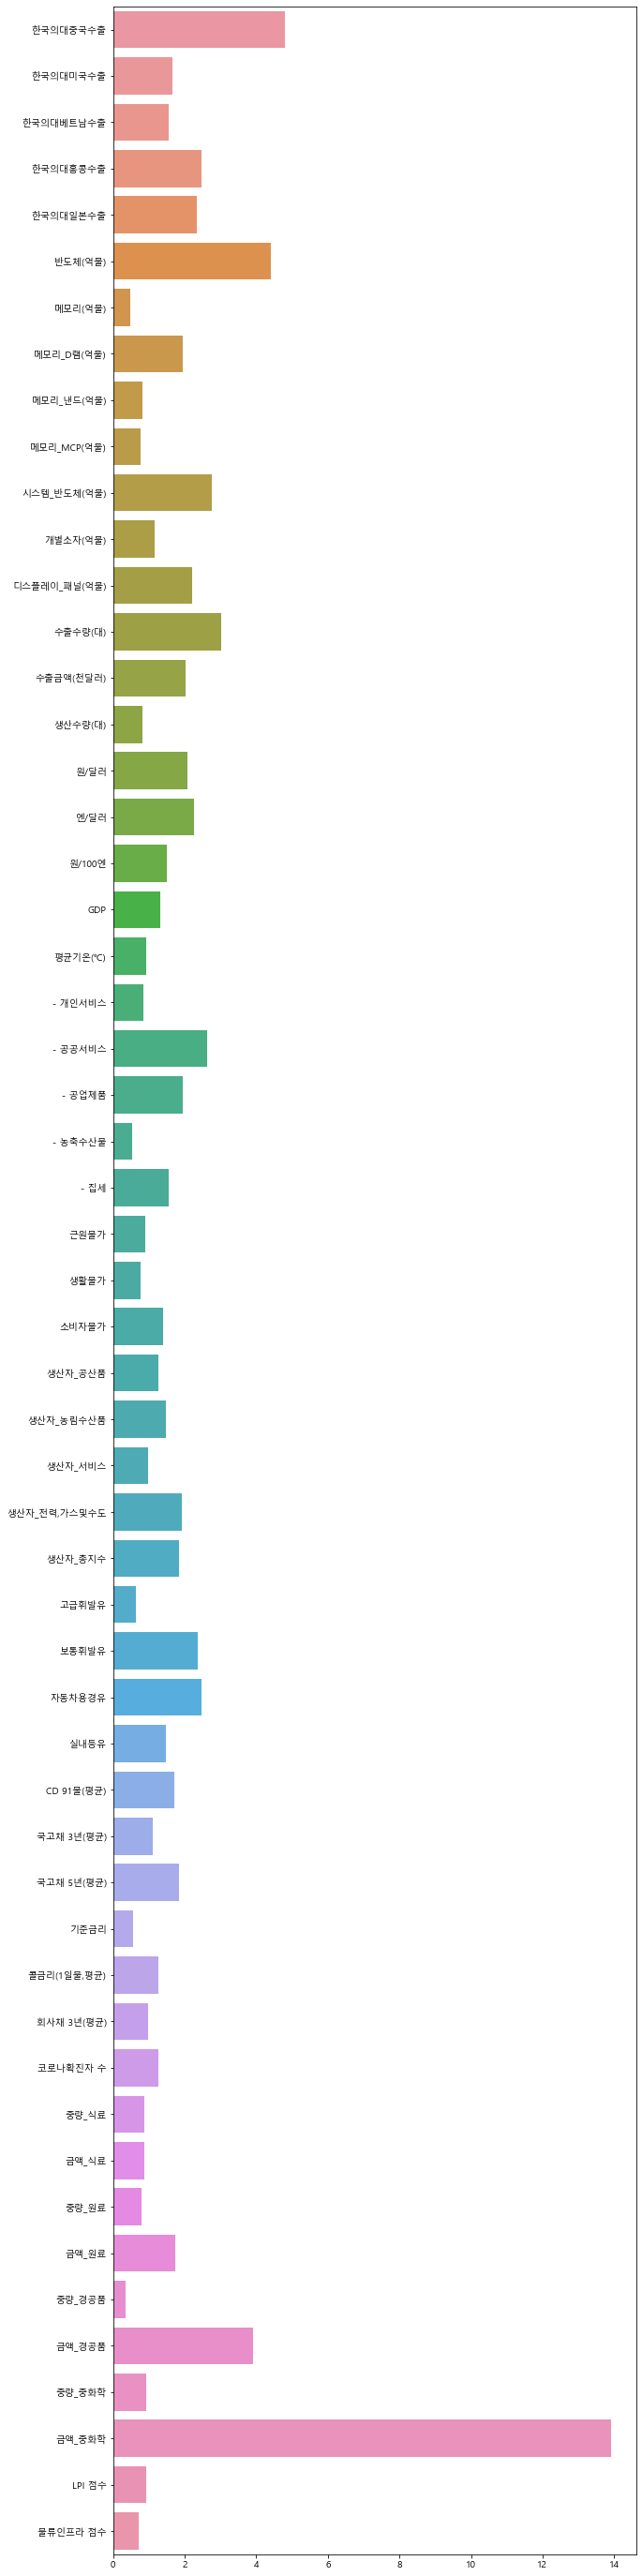

In [122]:
clf = CatBoostRegressor().fit(X_train, y_train)
plt.figure(figsize=(10,50))
f = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
plt.show()


In [123]:
feat_labels = X_train.columns

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 금액_중화학                         13.917638
 2) 한국의대중국수출                       4.796138
 3) 반도체(억불)                        4.413693
 4) 금액_경공품                         3.901424
 5) 수출수량(대)                        3.019373
 6) 시스템_반도체(억불)                    2.757565
 7) - 공공서비스                        2.636527
 8) 한국의대홍콩수출                       2.477967
 9) 자동차용경유                         2.461140
10) 보통휘발유                          2.370243
11) 한국의대일본수출                       2.330479
12) 엔/달러                           2.269666
13) 디스플레이_패널(억불)                   2.206690
14) 원/달러                           2.073565
15) 수출금액(천달러)                      2.028201
16) 메모리_D램(억불)                     1.949375
17) - 공업제품                         1.936811
18) 생산자_전력,가스및수도                   1.910637
19) 국고채 5년(평균)                     1.853347
20) 생산자_총지수                        1.845466
21) 금액_원료                          1.736285
22) CD 91물(평균)                     1.701980
23) 한국의대미국수출                   

### 단순회귀분석을 통한 stepwise

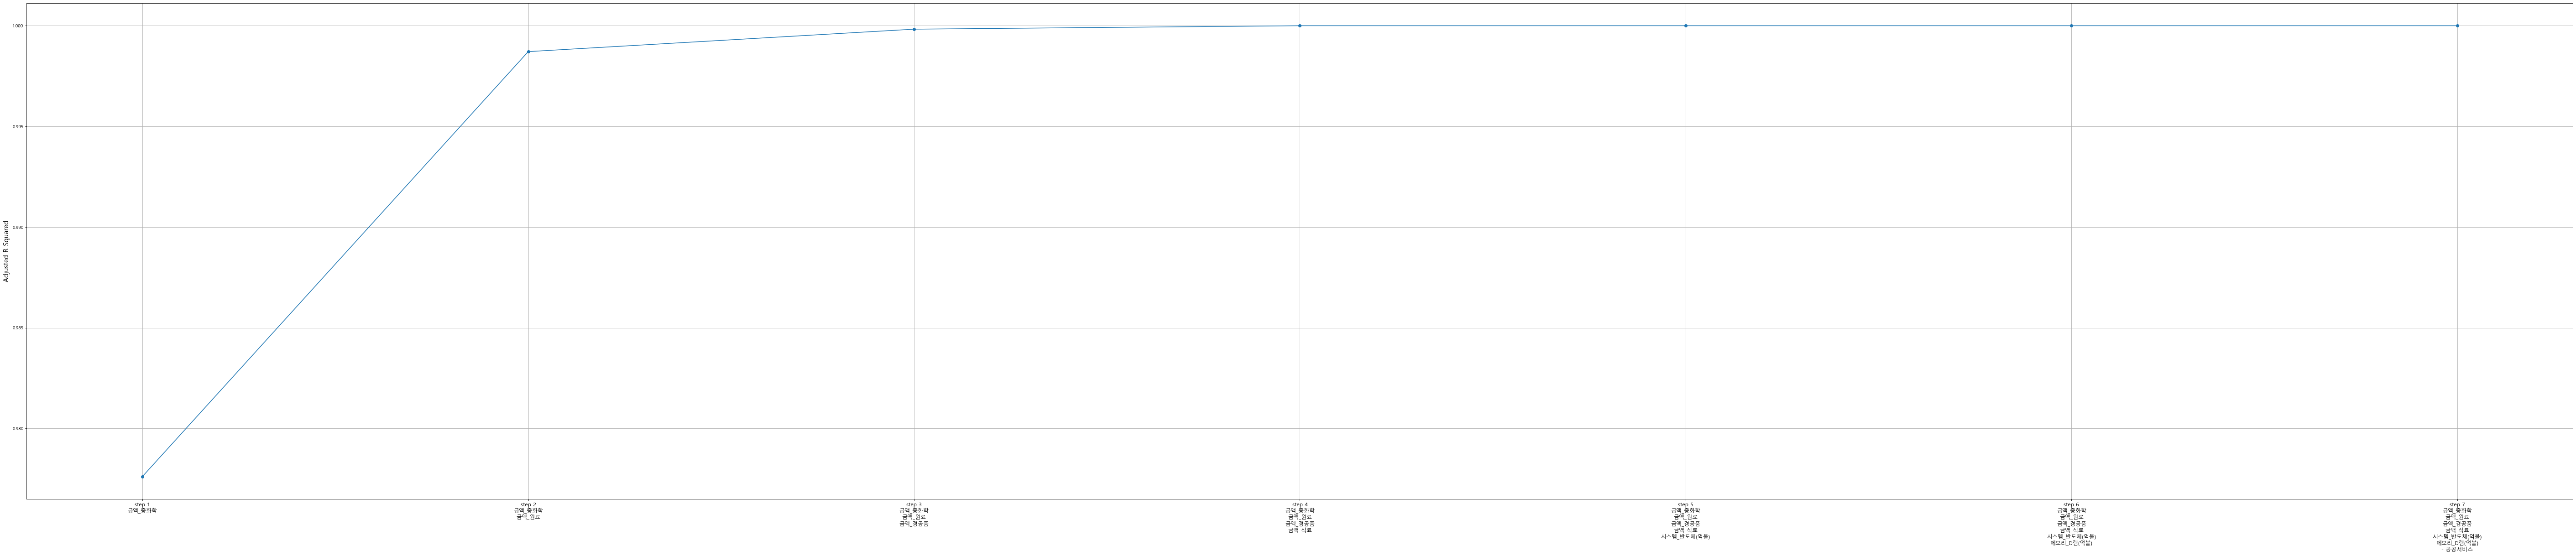

In [124]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,20))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)

In [125]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                한국 수출금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.141e+14
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          8.49e-238
Time:                        23:38:54   Log-Likelihood:                -316.50
No. Observations:                  42   AIC:                             649.0
Df Residuals:                      34   BIC:                             662.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1904.7009   1172.189      1.625      

### 각 상위 10개 항목 추출

In [147]:
X.columns.tolist()

['한국의대중국수출',
 '한국의대미국수출',
 '한국의대베트남수출',
 '한국의대홍콩수출',
 '한국의대일본수출',
 '반도체(억불)',
 '메모리(억불)',
 '메모리_D램(억불)',
 '메모리_낸드(억불)',
 '메모리_MCP(억불)',
 '시스템_반도체(억불)',
 '개별소자(억불)',
 '디스플레이_패널(억불)',
 '수출수량(대)',
 '수출금액(천달러)',
 '생산수량(대)',
 '원/달러',
 '엔/달러',
 '원/100엔',
 'GDP',
 '평균기온(℃)',
 '-\xa0개인서비스',
 '-\xa0공공서비스',
 '-\xa0공업제품',
 '-\xa0농축수산물',
 '-\xa0집세',
 '근원물가',
 '생활물가',
 '소비자물가',
 '생산자_공산품',
 '생산자_농림수산품',
 '생산자_서비스',
 '생산자_전력,가스및수도',
 '생산자_총지수',
 '고급휘발유',
 '보통휘발유',
 '자동차용경유',
 '실내등유',
 'CD\xa091물(평균)',
 '국고채\xa03년(평균)',
 '국고채\xa05년(평균)',
 '기준금리',
 '콜금리(1일물,평균)',
 '회사채\xa03년(평균)',
 '코로나확진자 수',
 '중량_식료',
 '금액_식료',
 '중량_원료',
 '금액_원료',
 '중량_경공품',
 '금액_경공품',
 '중량_중화학',
 '금액_중화학',
 'LPI 점수',
 '물류인프라 점수']

In [148]:
feaure_select = [ '금액_중화학',
 '한국의대중국수출',
 '-\xa0공업제품',
 '생산자_공산품',                 
 '반도체(억불)',                
 '수출수량(대)',                
 '금액_경공품',
 '한국의대베트남수출',
 '실내등유',               
 '원/달러',
 '디스플레이_패널(억불)',                
 '한국의대일본수출',               
 '생산자_총지수',
 '수출금액(천달러)',                 
 '시스템_반도체(억불)',                 
  'GDP',        
 '한국의대홍콩수출',                                 
 '한국의대미국수출',  
 '-\xa0개인서비스',
 '생산수량(대)',
 '금액_원료',
 '-\xa0공공서비스',
 '자동차용경유',
 '보통휘발유',
  '금액_식료',
 '메모리_D램(억불)'
]
                

In [149]:
X = X[feaure_select]
X.columns

Index(['금액_중화학', '한국의대중국수출', '- 공업제품', '생산자_공산품', '반도체(억불)', '수출수량(대)',
       '금액_경공품', '한국의대베트남수출', '실내등유', '원/달러', '디스플레이_패널(억불)', '한국의대일본수출',
       '생산자_총지수', '수출금액(천달러)', '시스템_반도체(억불)', 'GDP', '한국의대홍콩수출', '한국의대미국수출',
       '- 개인서비스', '생산수량(대)', '금액_원료', '- 공공서비스', '자동차용경유', '보통휘발유', '금액_식료',
       '메모리_D램(억불)'],
      dtype='object')

In [150]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, random_state = 2022)

In [151]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                한국 수출금액   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.376e+11
Date:                Sat, 02 Jul 2022   Prob (F-statistic):                    1.07e-92
Time:                        23:51:19   Log-Likelihood:                         -304.65
No. Observations:                  42   AIC:                                      661.3
Df Residuals:                      16   BIC:                                      706.5
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
금액_중화학         999.9997      0.000   5.88e+06      0.000     999.999    1000.000
한국의대중국수출     -4.579e-09   3.33e-07     -0.014      0.989    -7.1e-07    7.01e-07
- 공업제품         -52.1851    313.600     -0.166      0.870    -716.987     612.617
생산자_공산품        455.0362    454.823      1.000      0.332    -509.145    1419.217
반도체(억불)        -11.5567     61.913     -0.187      0.854    -142.806     119.693
수출수량(대)          0.0320      0.038      0.843      0.412      -0.048       0.112
금액_경공품        1000.0016      0.001   7.19e+05      0.000     999.999    1000.005
한국의대베트남수출     7.709e-07   8.39e-07      0.919      0.372   -1.01e-06    2.55e-06
실내등유            14.3060      8.983      1.593      0.131      -4.736      33.348
원/달러            -3.0550      3.762     -0.812      0.429     -11.030       4.920
디스플레이_패널(억불)   -16.1231     73.378     -0.220      0.829    -171.677     139.430
한국의대일본수출      1.898e-06   1.68e-06      1.127      0.276   -1.67e-06    5.47e-06
생산자_총지수       -501.5130    932.438     -0.538      0.598   -2478.193    1475.167
수출금액(천달러)       -0.0010      0.002     -0.463      0.649      -0.005       0.003
시스템_반도체(억불)     17.7698    106.730      0.166      0.870    -208.487     244.027
GDP              0.0405      0.037      1.096      0.289      -0.038       0.119
한국의대홍콩수출      -3.62e-07   6.19e-07     -0.585      0.567   -1.67e-06    9.49e-07
한국의대미국수출      1.498e-07   3.41e-07      0.440      0.666   -5.73e-07    8.72e-07
- 개인서비스       -501.5855    472.300     -1.062      0.304   -1502.818     499.647
생산수량(대)         -0.0082      0.011     -0.760      0.458      -0.031       0.015
금액_원료          999.9994      0.001   1.71e+06      0.000     999.998    1000.001
- 공공서비스        119.6785     97.270      1.230      0.236     -86.525     325.882
자동차용경유         -25.2681     16.224     -1.557      0.139     -59.660       9.124
보통휘발유           14.8080     11.751      1.260      0.226     -10.104      39.720
금액_식료          999.9946      0.004   2.69e+05      0.000     999.987    1000.003
메모리_D램(억불)     129.2294     92.211      1.401      0.180     -66.250     324.709
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.251
Skew:                           0.041   Prob(JB):                        0.882
Kurtosis:                       2.630   Cond. No.                     1.90e+11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of t

In [152]:
clfs = [
   (
        KNeighborsRegressor(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        MLPRegressor(random_state=2022),
        {'batch_size': [32, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
#    (
#        LogisticRegression(random_state=0),  
#        {'C': np.arange(0.1, 1.1, 0.1),      
 #        'penalty': ['l1','l2']}
 #   ),
    (
        RandomForestRegressor(random_state=2022),
        {'n_estimators': [100,200,300,400],
         'max_depth': [3,4,5,6],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingRegressor(random_state=2022),
        {'n_estimators': [100, 200, 300],
         'learning_rate':  np.arange(0.1, 0.6, 0.01),}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        XGBRegressor(random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.9, 0.01),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        CatBoostRegressor(random_state=0, eval_metric='RMSE',iterations=1000, l2_leaf_reg=20,bootstrap_type='Bernoulli', metric_period=50,od_type='Iter',od_wait=45,allow_writing_files=False),
        {'depth': [3,4,5],
         'learning_rate': np.arange(0.1, 0.6, 0.01),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm(clfs):
    start = time.time()
    grid_search = GridSearchCV(clf, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = grid_search.score(X_valid, y_valid)
    rmse_score = np.sqrt(-clf_score)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, rmse_score, time.time() - start))
    clfs_tuned.append((clf_name, grid_search, clf_score))
    print(grid_search.best_params_ )

 17%|██████████████                                                                      | 1/6 [00:08<00:40,  8.03s/it]

KNeighborsRegressor               -9376284043572488192.000000 3062071854.7
{'n_neighbors': 3, 'weights': 'distance'}


 33%|████████████████████████████                                                        | 2/6 [00:11<00:21,  5.39s/it]

MLPRegressor                      -7121885942242058240.000000 2668686182.8
{'activation': 'relu', 'batch_size': 32, 'learning_rate': 'constant', 'solver': 'adam'}


 50%|██████████████████████████████████████████                                          | 3/6 [00:18<00:18,  6.13s/it]

RandomForestRegressor             -3207787293021046784.000000 1791029674.0
{'max_depth': 4, 'n_estimators': 100}


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:31<00:17,  8.73s/it]

GradientBoostingRegressor         -3293940770291636736.000000 1814921698.1
{'learning_rate': 0.29999999999999993, 'n_estimators': 200}


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [05:13<01:47, 107.22s/it]

XGBRegressor                      -1661460256173832192.000000 1288976437.4
{'learning_rate': 0.16999999999999998, 'min_child_weight': 0, 'subsample': 0.6}
0:	learn: 4712041344.4915085	total: 768us	remaining: 768ms
50:	learn: 903129536.9463835	total: 30.3ms	remaining: 565ms
100:	learn: 438802392.9168622	total: 52.9ms	remaining: 471ms
150:	learn: 273178043.4405378	total: 81ms	remaining: 456ms
200:	learn: 152580430.8271652	total: 108ms	remaining: 430ms
250:	learn: 86241421.8582768	total: 134ms	remaining: 400ms
300:	learn: 51399950.8382932	total: 159ms	remaining: 370ms
350:	learn: 34051457.0727611	total: 186ms	remaining: 343ms
400:	learn: 22329297.8767356	total: 211ms	remaining: 316ms
450:	learn: 13837002.0098412	total: 247ms	remaining: 301ms
500:	learn: 8649547.9440794	total: 274ms	remaining: 273ms
550:	learn: 5566023.4408108	total: 302ms	remaining: 246ms
600:	learn: 3436679.6118406	total: 330ms	remaining: 219ms
650:	learn: 2204435.1942832	total: 356ms	remaining: 191ms
700:	learn: 1383825

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [33:13<00:00, 332.21s/it]

800:	learn: 512569.1107863	total: 434ms	remaining: 108ms
850:	learn: 321154.1406667	total: 468ms	remaining: 82ms
900:	learn: 224238.3044756	total: 496ms	remaining: 54.5ms
950:	learn: 139182.5837275	total: 526ms	remaining: 27.1ms
999:	learn: 95988.9631756	total: 550ms	remaining: 0us
CatBoostRegressor                 -4238274067985474560.000000 2058706892.2
{'depth': 3, 'learning_rate': 0.34999999999999987, 'subsample': 0.7999999999999999}


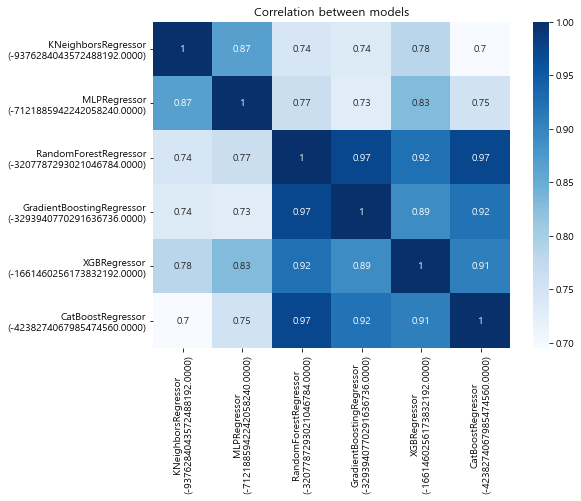

In [153]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict(X_valid)
    name = f'{name}\n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [154]:
ensemble_results

,KNeighborsRegressor\n(-9376284043572488192.0000),MLPRegressor\n(-7121885942242058240.0000),RandomForestRegressor\n(-3207787293021046784.0000),GradientBoostingRegressor\n(-3293940770291636736.0000),XGBRegressor\n(-1661460256173832192.0000),CatBoostRegressor\n(-4238274067985474560.0000)
0,3.958027e+10,4.164958e+10,4.433911e+10,4.254888e+10,4.324939e+10,4.575521e+10
1,4.834681e+10,4.433464e+10,4.386135e+10,4.260582e+10,4.358925e+10,4.402594e+10
2,4.708719e+10,4.462949e+10,4.413567e+10,4.428018e+10,4.379720e+10,4.300169e+10
3,4.816343e+10,4.379176e+10,5.076301e+10,5.094883e+10,4.973617e+10,4.993984e+10
4,4.787589e+10,4.519570e+10,4.509138e+10,4.417214e+10,4.495516e+10,4.589953e+10
5,4.495903e+10,4.247702e+10,4.869637e+10,4.867215e+10,4.933244e+10,4.912526e+10
6,3.867814e+10,3.834622e+10,3.971435e+10,4.133135e+10,3.509776e+10,3.857672e+10
7,4.774696e+10,4.604319e+10,4.454265e+10,4.330919e+10,4.367736e+10,4.487957e+10
8,4.792064e+10,4.569997e+10,4.589852e+10,4.585490e+10,4.546925e+10,4.701108e+10
9,4.524441e+10,3.919694e+10,4.301544e+10,4.321342e+10,3.951006e+10,4.326258e+10


In [155]:
ensemble_results.columns

Index(['KNeighborsRegressor\n(-9376284043572488192.0000)',
       'MLPRegressor\n(-7121885942242058240.0000)',
       'RandomForestRegressor\n(-3207787293021046784.0000)',
       'GradientBoostingRegressor\n(-3293940770291636736.0000)',
       'XGBRegressor\n(-1661460256173832192.0000)',
       'CatBoostRegressor\n(-4238274067985474560.0000)'],
      dtype='object')

In [160]:
sample['한국 수출금액'] = ensemble_results['XGBRegressor\n(-1661460256173832192.0000)']
sample

,기간,한국 수출금액
0,2022-01-01,4.324939e+10
1,2022-02-01,4.358925e+10
2,2022-03-01,4.379720e+10
3,2022-04-01,4.973617e+10
4,2022-05-01,4.495516e+10
5,2022-06-01,4.933244e+10


In [161]:
sample.to_excel('빅데이터분석_이정은(박우열).xlsx',index = False, encoding = 'utf-8')